# Authors

**Giorgios Petsangourakis**  
**Konstantinos Kalyfommatos**  
**Konstantinos Konstantinidis**  
**Styliani Mertzani**

## Required Libraries

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.io import arff
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal

# Problem 1

Fistly, we define some functions that will be needed across the whole exercise

In [84]:
# Computes the value of a polynomial given inputs and coefficients.
def polynomial_function(x, thetas):
    y = 0
    for i, theta in enumerate(thetas):
        y += theta * x ** i
    return y

# Generates noisy data based on a predefined polynomial.
def real_function(x, noize_scale, noize_mean=0):
    thetas = [0.2, -1, 0.9, 0.7, 0, -0.2]
    y = polynomial_function(x, thetas)
    if noize_scale > 0:
        random_noize = np.random.normal(loc=noize_mean, scale=noize_scale, size=x.size)
        y += random_noize
    return y

#  Creates training data by applying the real function with added noise.
def build_y_train(x_train, noize_scale, noize_mean=0):
    y_train = real_function(x_train, noize_scale=noize_scale, noize_mean=noize_mean)
    return y_train

# Estimates model coefficients using the least squares method.
def least_squares(x, y):
    thetas_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)), y)
    return thetas_hat

# Generates random points within a specified interval, by default sorted.
def produce_random_points_in_interval(low, high, size, sort=True):
    x = np.random.uniform(low, high, size=size)
    if sort:
        x.sort()
    return x

class MissingPointsError(ValueError):
    def __init__(self, context: str):
        super().__init__(
            f'''
            Both '{context}_data' and '_{context}_size' are undefined. 
            To proceed, you must either:
            1) Define '_{context}_size' to generate new random {context} points, or
            2) Provide '{context}_data' with predefined {context} points.
            '''
        )

### Note 
All the functions we created can both create a test/train set on their own, or we can give them these sets as arguments, so we are able to use them in the Exercise 7 without rewritting them. On the first 6 exercises we create a new test set each time, but in the last exercise we use the same test set in each experiment. 

## Exercise 1

In [85]:
def exercise_1(_sigma_eta_sq, _polynomial_degree=None, _train_size=None, _test_size=None, x_train=None, y_train=None,
               x_test=None, plot=True, label_hat = None):
    # Generate training data if not provided.
    if y_train is None:
        if not _train_size:
            raise MissingPointsError('train')
        x_train = np.linspace(start=0, stop=2, num=_train_size)
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
    # Build design matrix and estimate coefficients with the least squares method.
    # The case of full polynomial
    if _polynomial_degree:
        x_matrix = np.array([x_train ** i for i in range(_polynomial_degree + 1)]).T
        thetas_hat = least_squares(x_matrix, y_train)
    else:
        # Handle case for 5th degree polynomial excluding degree 4.
        x_matrix = np.array([x_train ** i for i in range(6) if i != 4]).T
        thetas_hat = least_squares(x_matrix, y_train)
        thetas_hat = np.insert(thetas_hat, 4, 0)

    # Generate test points if not provided.
    if x_test is None:
        if not _test_size:
            raise MissingPointsError('test')
        x_test = produce_random_points_in_interval(0, 2, _test_size)
    y_hat = polynomial_function(x_test, thetas_hat)
    y_test = real_function(x_test, noize_scale=0)

    # Plot the true function and predictions.
    if plot:
        _label = 'Least Squares'
        if label_hat:
            _label = label_hat
        plt.plot(x_train, real_function(x_train, noize_scale=0), '-', label = 'True function')
        plt.plot(x_test, y_hat, '-', label =_label)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    return y_test, y_hat

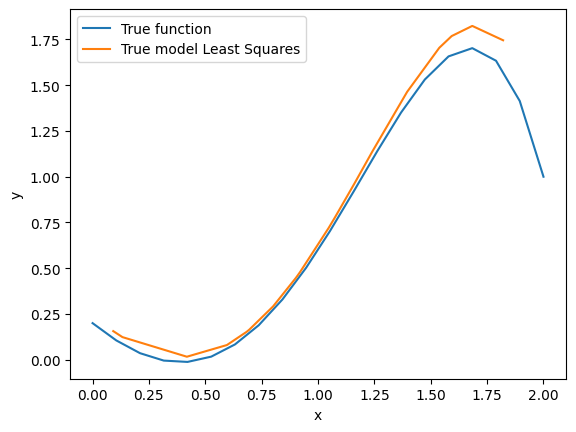

(array([ 0.11638805,  0.08494113, -0.012153  ,  0.05679389,  0.13026806,
         0.14210495,  0.26969055,  0.42423802,  0.45278435,  0.45543457,
         0.69177517,  0.7465858 ,  0.92212651,  0.94366399,  1.09552961,
         1.40065283,  1.61622682,  1.66889731,  1.70259483,  1.58570534]),
 array([0.1564233 , 0.12371345, 0.01653175, 0.08039762, 0.15239671,
        0.16410363, 0.29137518, 0.44730666, 0.47626621, 0.47895704,
        0.72034056, 0.77670832, 0.95825013, 0.98063704, 1.13929397,
        1.46397161, 1.70450142, 1.76872572, 1.82402785, 1.7455959 ]))

In [86]:
# True model (5th degree polynomial without 4th power)
exercise_1(_train_size=20, _test_size=20, _sigma_eta_sq=0.05, label_hat='True model Least Squares')

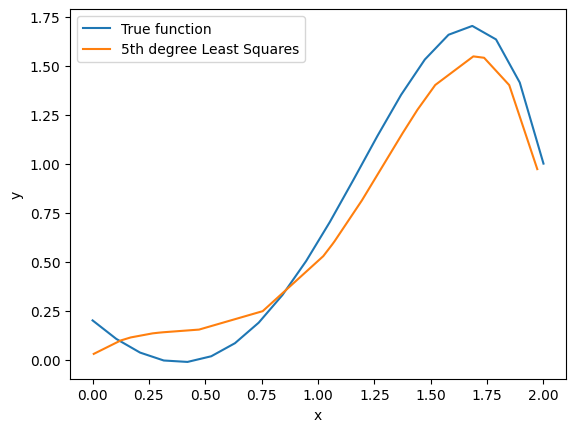

(array([ 1.94834292e-01,  9.06592556e-02,  6.00344406e-02,  1.05005950e-02,
         7.06170204e-04, -4.19208642e-03, -2.50938465e-03,  2.09689800e-01,
         6.44823425e-01,  7.22386711e-01,  7.43861356e-01,  9.96446613e-01,
         1.36205956e+00,  1.36437663e+00,  1.47977897e+00,  1.59477787e+00,
         1.70221140e+00,  1.68479232e+00,  1.53257038e+00,  1.12934575e+00]),
 array([0.02910147, 0.0975167 , 0.11302578, 0.13382509, 0.13755336,
        0.13951382, 0.15308393, 0.24716082, 0.52788483, 0.58675064,
        0.60344939, 0.81219194, 1.15370149, 1.15602556, 1.27489147,
        1.40118768, 1.5471394 , 1.54009281, 1.40054511, 0.97186933]))

In [87]:
# Full 5th degree polynomial
exercise_1(_train_size=20, _test_size=20, _sigma_eta_sq=0.05, _polynomial_degree=5, label_hat='5th degree Least Squares')

For this task, we were provided with a parametric functional form, $f_\vartheta(x)$, which is a 5th-degree polynomial with the coefficient of the 4th power set to zero, along with the values of the weight vector 𝜃. This functional form, was used to define the generating model responsible for creating the training samples. The training samples, denoted as $(x_n, y_n)$, consist of N equidistant points, $𝑥_𝑛$, within the interval [0.2]. Using these points, the $𝑦_𝑛$ values are produced by the parametric functional form $f_\vartheta(x)$ and also by adding noise samples originating from a Gaussian distribution.

Firstly, we applied the Least Squares method with the structure of the correct model(5th-degree polynomial with the 4th power set to zero), in order to estimate the associated unknown parameter values, $\hat{\theta}$,  so that we obtain a "good" fit to the data. Using the estimated parameters $\hat{\theta}$, along with a test set comprising of $N$ testing points, $x_{test}$, we estimated the corresponding y values for the samples in the test set, $\hat{y}$. To evaluate the performance of the parameter estimation, we plot the values $(x_{test}, y_{test})$ , $(x_{test}, \hat{y})$. We repeated the process, this time applying the Least Squares method with the structure of the full model (full 5th degree polynomial). 

We observe that in the first case, where we used the correct model, the estimated parameters provide a smaller deviation between the true function curve and the one derived from the least squares method, indicating that the correct model was in greater alignment with the generating model, leading to better predictions. In the case where we used the full model, although the resulted fit was "good", the difference between the true function curve and the one derived from the least squares method appeared to be greater compared to the corresponding difference of the correct model. 

## Exercise 2

Before proceeding to the exercise we should clarify how we plot each errorbar in each one of the following cases where it is needed.
Each errorbar is based on a 95% confidence interval which we will explain how it's built:
#### Case 1: Many Experiments and the Central Limit Theorem (CLT) (Exercise 2)
When conducting many experiments (e.g., 100), the **Central Limit Theorem (CLT)** helps us approximate the sampling distribution of the sample mean, even if the original data distribution is not normal, since it states that the sampling distribution of the sample mean approximates a normal distribution as the sample size increases, regardless of the original data distribution.

##### Steps to Build the 95% Confidence Interval:

1. **Perform Experiments**: Conduct multiple experiments (e.g., 100) and from the results $x_1, x_2,...,x_n$ calculate the sample mean $\bar{x}=\frac{x_1 + x_2 + \cdots + x_n}{n}$ and the sample variance $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$.
2. **95% Confidence Interval Formula**:
   The 95% CI for the sample mean is given by:
   $\text{CI} = \bar{x} \pm Z \cdot \text{SE}$,
   where: $Z = 1.96$ is the Z-score corresponding to a 95% confidence level and Standard Error (SE)= $ \frac{s}{\sqrt{n}} $, where $s$ is the sample variance from above.

#### Case 2: Variable Follows a Normal Distribution (Exercises 3 4 5)
When the variable itself follows a **normal distribution** with mean  $\mu$ and variance $\sigma^2$, confidence intervals can be built directly from the properties of the normal distribution.


#### Steps to Build the 95% Confidence Interval:
 1. **Given Mean and Variance**:Here, since mean $\mu$ and standard deviation $\sigma$ are known, we just proceed to the next step in order to calculate the CI.
2. **95% Confidence Interval Formula**:
   The 95% CI for a single observation that follows the Normal Distribution with mean  $\mu$ and variance $\sigma^2$ is given by:
     $\text{CI} = m \pm Z \cdot \sigma,$
     where $Z = 1.96$ (same as in Case 1) 

In [88]:
def exercise_2(_train_size, _sigma_eta_sq, _num_of_experiments, _polynomial_degree, plot=True, label_hat = None):
    # Generate evenly spaced training points.
    x_train = np.linspace(start=0, stop=2, num=_train_size)
    # Initialize storage for estimates.
    y_estimates = np.zeros([_train_size, _num_of_experiments])

    # Experiments
    for experiment in range(_num_of_experiments):
         # Generate noisy training data for each experiment.
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
        # Create the design matrix and estimate coefficients.
        x_matrix = np.array([x_train ** i for i in range(_polynomial_degree + 1)]).T
        thetas_hat = least_squares(x_matrix, y_train)
        # Compute predicted values for training points.
        y_hats = polynomial_function(x_train, thetas_hat)
        for idx, y_hat in enumerate(y_hats):
            y_estimates[idx][experiment] = y_hat
    # Compute the true function values without noise.
    y_test = real_function(x=x_train, noize_scale=0)
    # Compute the average prediction across experiments.
    y_hat = np.mean(y_estimates, axis=1)
    if plot:
        _label = 'Least Squares'
        if label_hat:
            _label = label_hat
        plt.plot(x_train, y_test, '-', label = 'True function')
        # The error margin (95% confidence intervals)
        # We use ddof=1 because we want to use n-1 in the denominator of the std formula
        plt.errorbar(x=x_train, y=y_hat, yerr=1.96 * (np.std(y_estimates, axis=1, ddof=1)/np.sqrt(len(x_train))), fmt='*',
                     capsize=5, label=_label)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    return y_test, y_hat

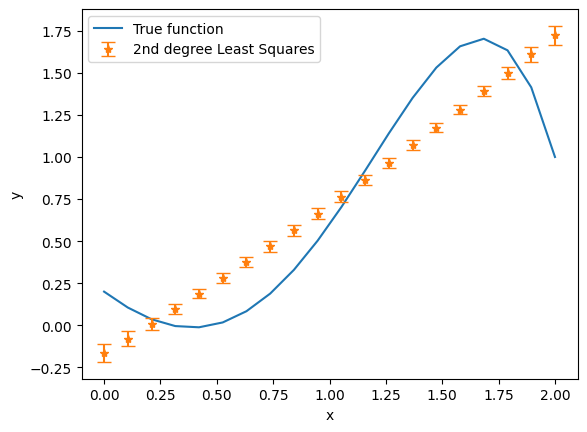

(array([ 0.2       ,  0.105523  ,  0.03581173, -0.00462284, -0.01189007,
         0.01697016,  0.08367735,  0.18840014,  0.3294462 ,  0.50295202,
         0.7025728 ,  0.91917221,  1.14051231,  1.35094332,  1.53109347,
         1.65755885,  1.70259323,  1.63379792,  1.41381156,  1.        ]),
 array([-0.16490318, -0.07880108,  0.00877679,  0.09783043,  0.18835984,
         0.28036502,  0.37384596,  0.46880268,  0.56523516,  0.66314341,
         0.76252744,  0.86338723,  0.96572279,  1.06953411,  1.17482121,
         1.28158408,  1.38982271,  1.49953712,  1.61072729,  1.72339323]))

In [89]:
# 2nd degree Least Squares
exercise_2(_train_size=20, _sigma_eta_sq=0.05, _num_of_experiments=100, _polynomial_degree=2, label_hat='2nd degree Least Squares')

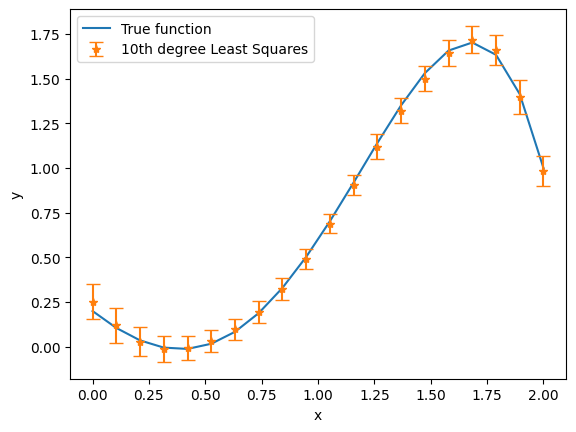

(array([ 0.2       ,  0.105523  ,  0.03581173, -0.00462284, -0.01189007,
         0.01697016,  0.08367735,  0.18840014,  0.3294462 ,  0.50295202,
         0.7025728 ,  0.91917221,  1.14051231,  1.35094332,  1.53109347,
         1.65755885,  1.70259323,  1.63379792,  1.41381156,  1.        ]),
 array([ 0.25131259,  0.1193528 ,  0.02909075, -0.01245915, -0.00848455,
         0.03050241,  0.09748429,  0.19342117,  0.32368401,  0.49079733,
         0.68904702,  0.90444905,  1.11987765,  1.32143505,  1.50002752,
         1.64321349,  1.71832721,  1.6602741 ,  1.39786114,  0.98268449]))

In [90]:
# 10th degree Least Squares
exercise_2(_train_size=20, _sigma_eta_sq=0.05, _num_of_experiments=100, _polynomial_degree=10, label_hat='10th degree Least Squares')

For this task, we applied the least squares method on the same training set generated in the previous exercise, only this time we assumed a 2nd degree polynomial and a 10th degree polynomial structure. We performed 100 experiments for both cases, using distinct noise samples in the training set for each experiment. For each point of the training set, we computed the mean and variance of the prediction for y across the 100 experiments.
In the case of the **2nd degree polynomial structure**, the model's simpler structure in comparison to the true model's 5th degree polynomial structure led to a significant difference between the means of the predictions for y and the true values for y, obtained by the true function. This disagreement reflects on the model's **high bias**. However, the model's greater simplicity also prevented the model from overfitting to the noise in the training set, keeping the predictions relatively stable, resulting in **low variance**.
On the other hand, the **10th degree polynomial structure** introduced additional power terms that increased the complexity and the flexibility of the model, which allowed the model to fit the data better and as a result this model exhibited **low bias**. Although the 10th degree polynomial structure appeared to fit the data better, the additional flexibility came at the cost of greater sensitivity to the noise of the training set. The model's tendency to overfit the data and to be very sensitive to the changes of the noise across the 100 experiments and resulted in **high variance** in the predictions.

## Exercise 3

In [91]:
def exercise_3(_thetas, _sigma_theta_sq, _sigma_eta_sq, _train_size=None, _test_size=None, x_train=None,
               y_train=None, x_test=None, plot=True, label_hat=None):
    # Train
    if y_train is None:
        if not _train_size:
            raise MissingPointsError('train')
        x_train = np.linspace(start=0, stop=2, num=_train_size)
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
    x_train_matrix = np.array([x_train ** i for i in range(6) if i != 4]).T
    # Compute posterior mean of theta given y (mu_theta_given_y)
    mu_theta_given_y = _thetas + (1 / _sigma_eta_sq) * np.matmul(np.matmul(np.linalg.inv(
        (1 / _sigma_theta_sq) * np.identity(len(_thetas)) + (1 / _sigma_eta_sq) * np.matmul(x_train_matrix.T,
                                                                                            x_train_matrix)),
        x_train_matrix.T), y_train - np.matmul(x_train_matrix, _thetas))
    # Compute posterior covariance matrix of theta given y
    # cov_matrix_theta_given_y = np.linalg.inv(
    #     (1 / _sigma_theta_sq) * np.identity(len(_thetas)) + (1 / _sigma_eta_sq) * np.matmul(x_train_matrix.T,
    #                                                                                         x_train_matrix))

    if x_test is None:
        if not _test_size:
            raise MissingPointsError('test')
        x_test = produce_random_points_in_interval(0, 2, _test_size)
    x_test_matrix = np.array([x_test ** i for i in range(6) if i != 4]).T
    # Compute the mean of y for test data
    mu_y = np.matmul(x_test_matrix, mu_theta_given_y)
    y_hat = mu_y
    # Compute variance of y for test data
    sigma_y_sq = np.array([
        _sigma_eta_sq + _sigma_eta_sq * _sigma_theta_sq * np.matmul(
            np.matmul(x_test_matrix[i].T, np.linalg.inv(_sigma_eta_sq * np.identity(
                len(_thetas)) + _sigma_theta_sq * np.matmul(x_train_matrix.T, x_train_matrix))), x_test_matrix[i]) for i
        in
        range(x_test_matrix.shape[0])])

    y_test = real_function(x_test, noize_scale=0)
    # Plot the true function and predictions with confidence intervals.
    if plot:
        _label = 'FBI'
        if label_hat:
            _label = label_hat
        plt.plot(x_train, real_function(x_train, noize_scale=0), '-', label='True function')
        plt.errorbar(x=x_test, y=y_hat, yerr=1.96 * np.sqrt(sigma_y_sq), fmt='*', capsize=5, label=_label)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    return y_test, y_hat

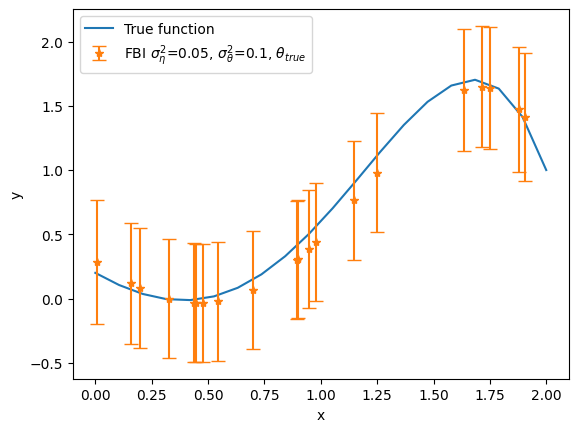

(array([ 1.92644819e-01,  6.81384115e-02,  4.33960090e-02, -6.65798560e-03,
        -1.01213015e-02, -8.17924669e-03, -7.12296602e-04,  2.49245259e-02,
         1.46486466e-01,  4.15710678e-01,  4.18789193e-01,  5.04351999e-01,
         5.59583628e-01,  8.96012985e-01,  1.10937913e+00,  1.69329798e+00,
         1.69612570e+00,  1.67409077e+00,  1.45256561e+00,  1.38063449e+00]),
 array([ 2.82824342e-01,  1.19743850e-01,  8.44015164e-02,  4.24275387e-04,
        -3.13950122e-02, -3.23862438e-02, -3.26863427e-02, -2.24082428e-02,
         6.54417161e-02,  3.02186837e-01,  3.05026247e-01,  3.84709221e-01,
         4.36847234e-01,  7.63696444e-01,  9.78143392e-01,  1.62177203e+00,
         1.64920663e+00,  1.64014368e+00,  1.47165612e+00,  1.41121800e+00]))

In [92]:
true_thetas = np.array([0.2, -1, 0.9, 0.7, -0.2])
exercise_3(_thetas=true_thetas, _sigma_theta_sq=0.1, _train_size=20, _sigma_eta_sq=0.05, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.05, $\sigma_{\theta}^2$=0.1, $\theta_{true}$')

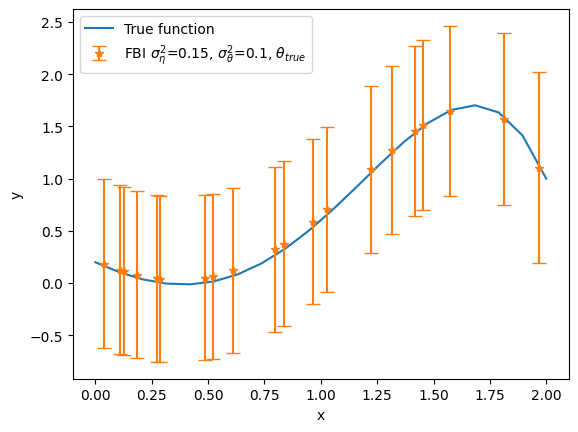

(array([0.16420942, 0.10283311, 0.08941144, 0.05015725, 0.00714131,
        0.00321367, 0.00195723, 0.0147545 , 0.06821633, 0.26730546,
        0.32309368, 0.53709802, 0.65615015, 1.05491985, 1.24843104,
        1.44077454, 1.50223759, 1.65231327, 1.60047702, 1.15136438]),
 array([0.18679794, 0.13001414, 0.11774015, 0.08229728, 0.04500799,
        0.04180123, 0.05116893, 0.06535434, 0.12175659, 0.32276509,
        0.37815913, 0.58877834, 0.70498638, 1.09027135, 1.27491005,
        1.45619064, 1.51335617, 1.64910469, 1.56895215, 1.10634772]))

In [93]:
exercise_3(_thetas=true_thetas, _sigma_theta_sq=0.1, _train_size=20, _sigma_eta_sq=0.15, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.15, $\sigma_{\theta}^2$=0.1, $\theta_{true}$')

For this task, we used a Gaussian prior for the unknown parameter vector Θ with mean $θ_0$ equal to the true parameter vector $(\theta_0=0.2, \theta_1= -1, \theta_2=0.9, \theta_3=0.7,\theta_4=0, \theta_5=-0.2 )$ and covariance matrix $\Sigma_\theta = \sigma_\theta^2 I$, $\sigma_\theta^2 = 0,1$. Additionally, we adopted the structure and noise variance of the true model while performing Full Bayesian Inference, in order to evaluate y for a given test set. Firstly, we computed the mean vector $\mu_\theta|y$ of the posteriori pdf(probability density function).The posterior mean was then used for the computation of $\mu_y$, which represents the most probable value of y. For a given x, we approximated the predicted value of y using the most probable value , $\mu_y$ and the associated uncertainty $\sigma_y^2$. 
The impact of encoding our prior knowledge for the unknown parameter vector is evident in the graphs, with the estimates lying relatively close to the true function curve. This indicates that the model leads to better estimates, in comparison to the estimates obtained by the aforementioned model in exercise 1. A more detailed comparison of the methods will be discussed in exercise 7. It should also be mentioned that the larger the noise variance, the larger the error bars become. When the noise variance is small the predictions appear to be more precise and deviate less from the true function curve. On the other hand, when the noise variance is larger, the noise obscurs the data pattern and prevents the model from descerning the underlying pattern of the data, leading to larger deviation from the true function curve, due to the increased uncertainty. 

## Exercise 4

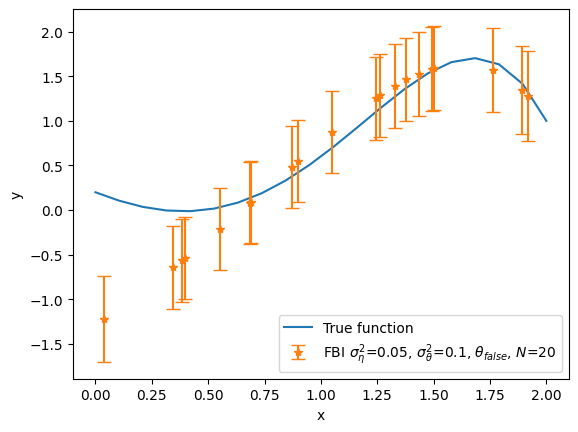

(array([ 0.16315381, -0.01018362, -0.01333701, -0.01326968,  0.03096757,
         0.13388995,  0.13770326,  0.37340493,  0.42012695,  0.69794368,
         1.10045321,  1.14276146,  1.27392253,  1.37185498,  1.46937274,
         1.558857  ,  1.57022964,  1.66285655,  1.42470111,  1.34007813]),
 array([-1.22067033, -0.64169941, -0.56269126, -0.53302953, -0.2081945 ,
         0.08031996,  0.08864565,  0.48841939,  0.55205877,  0.87823549,
         1.25426585,  1.2890851 ,  1.39190537,  1.46346394,  1.52968984,
         1.58471386,  1.59117187,  1.56803013,  1.34662817,  1.27633534]))

In [94]:
false_thetas = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])
exercise_3(_thetas=false_thetas, _sigma_theta_sq=0.1, _train_size=20, _sigma_eta_sq=0.05, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.05, $\sigma_{\theta}^2$=0.1, $\theta_{false}$, $N$=20')

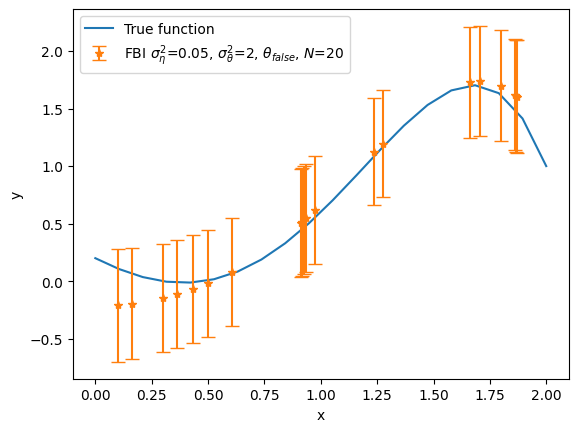

(array([ 1.08418159e-01,  6.36865321e-02, -2.69443933e-04, -1.22087803e-02,
        -1.01282590e-02,  6.49748123e-03,  6.30723713e-02,  4.43098853e-01,
         4.50587107e-01,  4.66064389e-01,  4.83876980e-01,  5.50664477e-01,
         1.08689536e+00,  1.16334374e+00,  1.70163012e+00,  1.69877932e+00,
         1.62308778e+00,  1.50593694e+00,  1.48834909e+00,  1.48180272e+00]),
 array([-0.20987685, -0.19437497, -0.14532122, -0.11264524, -0.06734617,
        -0.0177056 ,  0.08011703,  0.50908809,  0.51660264,  0.53208517,
         0.54982609,  0.61569062,  1.12458758,  1.19598466,  1.72904671,
         1.73758306,  1.69976074,  1.62136932,  1.60906794,  1.60446684]))

In [95]:
exercise_3(_thetas=false_thetas, _sigma_theta_sq=2, _train_size=20, _sigma_eta_sq=0.05, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.05, $\sigma_{\theta}^2$=2, $\theta_{false}$, $N$=20')

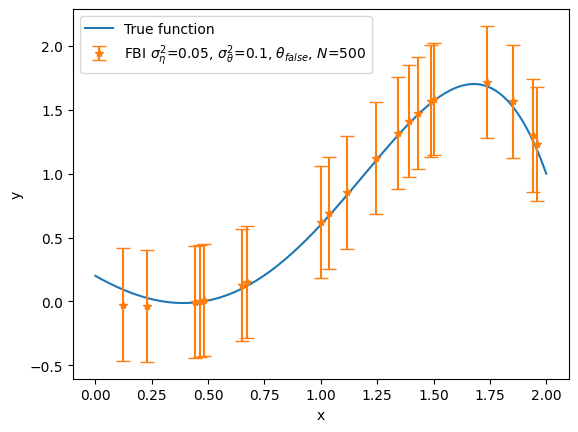

(array([ 9.21464585e-02,  2.55162515e-02, -9.28718782e-03, -4.31349147e-03,
         8.32608883e-05,  1.01233963e-01,  1.20195055e-01,  5.98796677e-01,
         6.73656046e-01,  8.35595563e-01,  1.10644370e+00,  1.30395625e+00,
         1.39601151e+00,  1.45993487e+00,  1.55088276e+00,  1.56948994e+00,
         1.68521507e+00,  1.52712167e+00,  1.25811793e+00,  1.18913346e+00]),
 array([-0.02607355, -0.03492029, -0.00388107,  0.00555973,  0.01262107,
         0.12964361,  0.1492798 ,  0.62086539,  0.69407866,  0.8529525 ,
         1.12075217,  1.31817867,  1.41100354,  1.47585734,  1.56889332,
         1.58807872,  1.71795856,  1.56664133,  1.30063504,  1.23183257]))

In [96]:
exercise_3(_thetas=false_thetas, _sigma_theta_sq=0.1, _train_size=500, _sigma_eta_sq=0.05, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.05, $\sigma_{\theta}^2$=0.1, $\theta_{false}$, $N$=500')

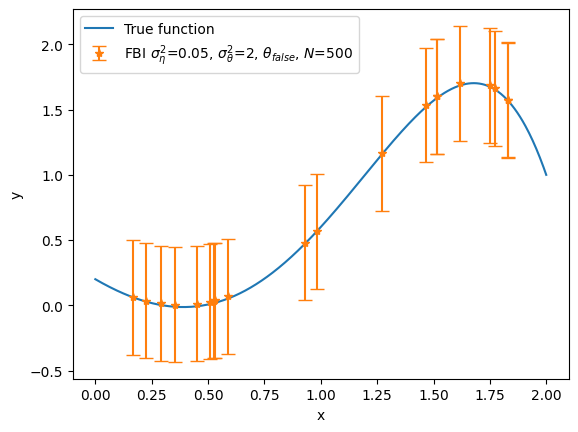

(array([ 0.06231465,  0.02787897,  0.00239373, -0.0109844 , -0.00782291,
         0.00986123,  0.01686014,  0.01874297,  0.05055676,  0.47408548,
         0.56499316,  1.15860176,  1.52345199,  1.58837546,  1.58869085,
         1.68623884,  1.67521495,  1.6532808 ,  1.5709958 ,  1.56889793]),
 array([0.06147606, 0.03529439, 0.01582734, 0.00605725, 0.01136021,
        0.02869108, 0.03542061, 0.03722656, 0.06763467, 0.47871875,
        0.56852303, 1.16381381, 1.53528673, 1.60162441, 1.60194659,
        1.70119597, 1.68661301, 1.66302852, 1.57511509, 1.5728784 ]))

In [97]:
exercise_3(_thetas=false_thetas, _sigma_theta_sq=2, _train_size=500, _sigma_eta_sq=0.05, _test_size=20,
               label_hat=r'FBI $\sigma_{\eta}^2$=0.05, $\sigma_{\theta}^2$=2, $\theta_{false}$, $N$=500')

In this task, we applied the Full Bayesian Inference method to two datasets with different sizes $\textbf{N}$ (20, 500) and used two different values for $\sigma_\theta^2$ (0,1, 2). In contrast to the previous exercise, for all four  experiments we assigned completely false values to the mean vector (our prior knowledge for the unknown parameter vector **Θ**), which did not align with the true parameter values. 
In the first experiment (**$\sigma_\theta^2 = 0.1$**, $\textbf{N}$=20) the false prior introduced bias to the posterior distribution, resulting in completely inaccurate predictions and parameter estimates that do not align closely to the true function curve. Furthermore, the significance of the false prior in influencing the model's ability to estimate the predicted values of y was enhanced by the small $\sigma_\theta^2$. As it was dicussed in the lectures we gave too much trust on the magician (small $\sigma_\theta^2$), who as it looks gave as false values(False $\boldsymbol{\Theta}$). 

In the following experiment (**$\sigma_\theta^2 = 2$**, $\textbf{N}$=20) where the $\sigma_\theta^2$ value was increased, the model's performance improved greately and its predictions deviated evidently less from the true function curve, compared to the previous experiment(We gave less trust to the magician). The improvement in the model's predictions can be credited to the larger $\sigma_\theta^2$ that weakened the influence of the false prior. Since the larger $\sigma_\theta^2$ signifies greater uncertainty in the prior, the model does not put much trust in it when estimating the predicted values of y. 

In the third experiment (**$\sigma_\theta^2 = 0,1$**, $\textbf{N}$=500) the $\sigma_\theta^2$ remained the same as in the first experiment, but the dataset size was increased to 500 data points. Similarily, with the experiment where the $\sigma_\theta^2$ was increased, the larger data set overpowered the influence of the false prior, allowing the model to approximate better the true parameter values and produce much better estimates that aligned closer with the true function curve. The results show that a larger dataset can compensate for the bias introduced by the false mean. 

Finally, in the experiment (**$\sigma_\theta^2 = 2$**, $\textbf{N}$=500) where both the $\sigma_\theta^2$ and the dataset size were increased, the results obtained appear to be almost in total alignment with the true function curve, showing the greatest improvement in prediction accuracy among all four experiments. The larger $\sigma_\theta^2$ combined with the larger dataset, mitigated the impact of the false prior and amplifed the model's ability to rely almost entirely on the data, producing highly accurate predictions. The aforementioned comments can also be validated by the formula that calculates the $\boldsymbol{\hat{\theta}}$ where 
$$\boldsymbol{\hat{\theta}} = \mu_{\boldsymbol{\theta} | \mathbf{y}} = \boldsymbol{\theta}_0 + \frac{1}{\sigma_\eta^2} \left( \frac{1}{\sigma_\theta^2} \mathbf{I} + \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \left( \mathbf{y} - \boldsymbol{\Phi} \boldsymbol{\theta}_0 \right)
$$
For the second experiment where $\sigma_\theta^2$ >> $\sigma_\eta^2$ we can assume that $\frac{1}{\sigma_\theta^2} \mathbf{I} + \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \approx  \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi}$, so
$$\boldsymbol{\hat{\theta}} \approx \boldsymbol{\theta}_0 +  \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \left( \mathbf{y} - \boldsymbol{\Phi} \boldsymbol{\theta}_0 \right) = 
$$  
$$= \boldsymbol{\theta}_0 +  \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}  - \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right) \boldsymbol{\theta}_0  = \boldsymbol{\theta}_0 +  \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}  - \boldsymbol{\theta}_0 =  \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}  - \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right) \boldsymbol{\theta}_0  =   \left( \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y} \equiv \boldsymbol{\theta}_{Least Squares}
$$  
Similarly for the third experiment where $N = 500$ ($N \rightarrow \infty$)
we can assume that $\frac{1}{\sigma_\theta^2} \mathbf{I} + \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \approx  \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi}$ and we derive the same result. The proof is based on the idea that since every term of $\boldsymbol{\Phi}^\top \boldsymbol{\Phi}$ is calculated via this way: 
$$[\Phi^T \Phi]_{ij} = \sum_{k=1}^N \phi_{ki} \phi_{kj}.$$
Regarding the diagonal elements of the matrix ($i=j$) they are produced this way:
$$[\Phi^T \Phi]_{ii} = \sum_{k=1}^N \phi_{ki}^2$$
We should mention here that since $\boldsymbol{\Phi}$ is a $N \times d$ matrix, $\boldsymbol{\Phi}^\top \boldsymbol{\Phi}$ is a $d \times d$ matrix. 
So as N gets bigger, we except a bigger value for the dot product of the diagonal elements. In addition the first term ($\frac{1}{\sigma_\theta^2} \mathbf{I}$) affects only the diagonal elements.

## Exercise 5

In [98]:
def exercise_5(_sigma_eta_sq=None, init_a=1, init_b=1, epsilon=10 ** (-7), _train_size=None, _test_size=None, x_train=None,
               y_train=None, x_test=None, plot=True):
    if y_train is None:
        if not _train_size:
            raise MissingPointsError('train')
        x_train = np.linspace(start=0, stop=2, num=_train_size)
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
    _train_size = len(y_train)
    x_train_matrix = np.array([x_train ** i for i in range(6) if i != 4]).T
    # Initialize parameters for EM algorithm.
    a = []
    b = []
    a.append(init_a)
    b.append(init_b)
    k = x_train_matrix.shape[1]
    # EM Algorithm
    while True:
        # E-step
        cov_matrix_theta_given_y = np.linalg.inv(
            a[-1] * np.identity(k) + b[-1] * np.matmul(x_train_matrix.T, x_train_matrix))
        mu_theta_given_y = b[-1] * np.matmul(np.matmul(cov_matrix_theta_given_y, x_train_matrix.T), y_train)

        big_a = np.linalg.norm(mu_theta_given_y) ** 2 + np.trace(cov_matrix_theta_given_y)
        big_b = np.linalg.norm(y_train - np.matmul(x_train_matrix, mu_theta_given_y)) ** 2 + np.trace(
            np.matmul(x_train_matrix, np.matmul(cov_matrix_theta_given_y, x_train_matrix.T)))
        # M-Step: Update the parameters a and b.
        a.append(k / big_a)
        b.append(_train_size / big_b)
        if np.abs(a[-1] - a[-2]) < epsilon and np.abs(b[-1] - b[-2]) < epsilon:
            break
    # Compute final noise and prior variance parameters.
    _sigma_eta_sq = 1 / b[-1]
    _sigma_theta_sq = 1 / a[-1]
    if x_test is None:
        if not _test_size:
            raise MissingPointsError('test')
        x_test = produce_random_points_in_interval(0, 2, _test_size)
    x_test_matrix = np.array([x_test ** i for i in range(6) if i != 4]).T
    mu_y = np.matmul(x_test_matrix, mu_theta_given_y)
    y_hat = mu_y
    # Compute predictions and uncertainties for test points.
    sigma_y_sq = np.array([
        _sigma_eta_sq + _sigma_eta_sq * _sigma_theta_sq * np.matmul(
            np.matmul(x_test_matrix[i].T, np.linalg.inv(_sigma_eta_sq * np.identity(
                len(mu_theta_given_y)) + _sigma_theta_sq * np.matmul(x_train_matrix.T, x_train_matrix))),
            x_test_matrix[i]) for i
        in
        range(x_test_matrix.shape[0])])

    y_test = real_function(x_test, noize_scale=0)

    if plot:
        # Plot the true function and predictions with confidence intervals.
        plt.plot(x_train, real_function(x_train, noize_scale=0), '-', label = 'True function')
        plt.errorbar(x=x_test, y=y_hat, yerr=1.96 * np.sqrt(sigma_y_sq), fmt='*', capsize=5, label =  'EM')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        # Plot convergence of _sigma_theta_sq over iterations.
        plt.axhline(y=_sigma_theta_sq, color='r', linestyle='-')
        plt.plot(range(len(a)), 1 / np.array(a), label='sigma_theta_squared', color='b')
        plt.annotate(f'{_sigma_theta_sq:.4f}',
                     xy=(0, _sigma_theta_sq),
                     xytext=(-30, 0),
                     textcoords='offset points',
                     ha='right',
                     va='center',
                     color='r')
        plt.xlabel('Iterations')
        plt.ylabel(r'$\sigma_{\theta}^2$')
        plt.show()

        # Plot convergence of _sigma_eta_sq over iterations.
        plt.axhline(y=_sigma_eta_sq, color='r', linestyle='-')
        plt.plot(range(len(b)), 1 / np.array(b), color='b', alpha=0.8)
        plt.annotate(f'{_sigma_eta_sq:.4f}',
                     xy=(0, _sigma_eta_sq),
                     xytext=(-30, 0),
                     textcoords='offset points',
                     ha='right',
                     va='center',
                     color='r')
        plt.xlabel('Iterations')
        plt.ylabel(r'$\sigma_{\eta}^2$')
        plt.show()
    return y_test, y_hat

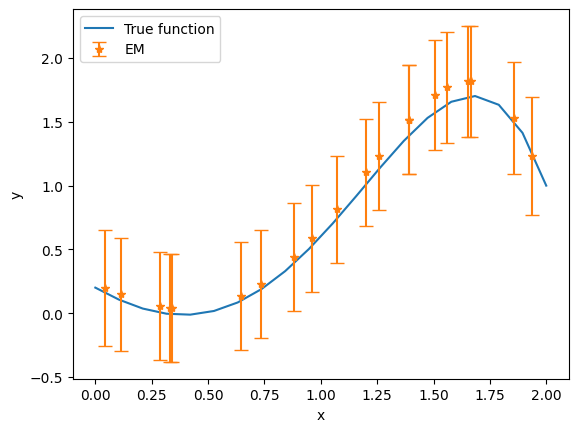

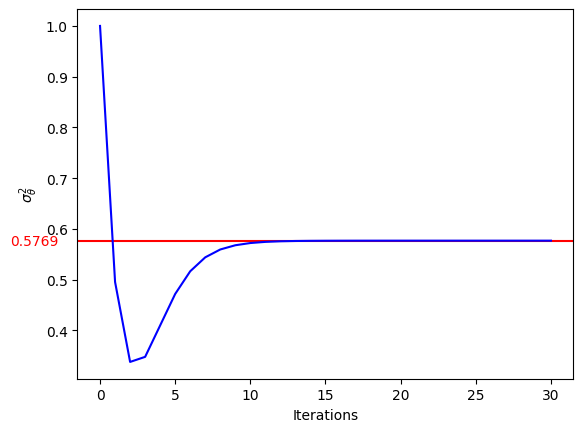

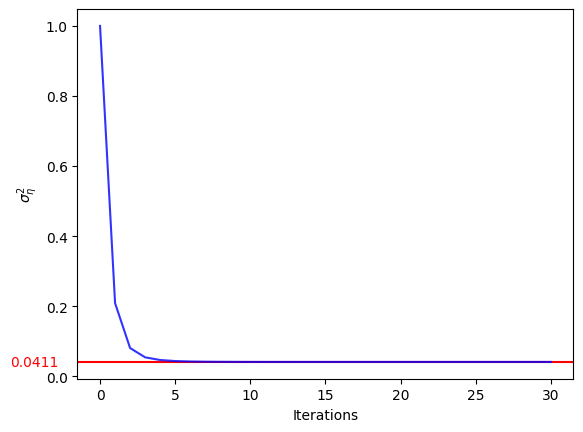

(array([ 0.15697911,  0.10026596,  0.00372205, -0.00745612, -0.00907361,
         0.09484441,  0.18706571,  0.38915849,  0.52607192,  0.73892809,
         1.00745393,  1.12737365,  1.39254546,  1.39426178,  1.57863159,
         1.63904605,  1.69902386,  1.70202831,  1.50841349,  1.27640458]),
 array([0.19899893, 0.14760636, 0.05365532, 0.04154135, 0.03968402,
        0.13645962, 0.23028173, 0.44109806, 0.58621438, 0.81393349,
        1.1030928 , 1.23233803, 1.51636782, 1.51818858, 1.71021926,
        1.7696417 , 1.81818693, 1.8177822 , 1.53278995, 1.23064835]))

In [99]:
exercise_5(_sigma_eta_sq=0.05, _train_size=20, _test_size=20)

In this task, we applied the Expectation-Maximization algorithm in order to derive the $\boldsymbol{\theta}$,  which we consider as latent variable. In order to find it, we also need to approximate the  unknown non random variables
$\sigma_\theta^2$ and $\sigma_\eta^2$(We use $\alpha = 1/\sigma_\theta^2, \beta=1/\sigma_\eta^2$). During the E-Step we compute the expectation of the
complete log-likelihood with respect to the latent variables. The
expectation is taken with respect to the posterior where we treat $\boldsymbol{\theta}$ as random variable. Then, during the M-Step, we maximize the function which is derived from the E-Step with respect to the  variables $\alpha, \beta$ in order to find a better estimation for them. The algorithm does this steps does these steps until our convergence criterion is met.

 We used the recovered values of $\sigma_\theta^2$ and $\sigma_\eta^2$ to estimate the predicted values of y and their errors, over a dataset comprising of 20 points. The recovered value of the noise variance, **0.048**, appears to be very close to the true variance of the noise, $\sigma_\eta^2$=0.05 . We seek to recover the variance of the noise because it is not directly observed, since it is an unknown variable, but it plays an important role in affecting the model's predictions. Using the EM algorithm we derive the value corresponding to the noise variance by combining our prior knowledge and the observed data, ensuring that it aligns with our model's predictions and resulting in improved parameter estimation. 

## Exercise 6

The following section includes the necessary computations required to define the Parzen Windows method:

We know that:
$\int_{-\infty}^{+\infty} y \exp\left[-a(y-b)^2\right] \, dy = b \sqrt{\frac{\pi}{a}}$

Now:
$p(x) = \frac{1}{N\sqrt{2\pi h^2}} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right]=\frac{1}{N h \sqrt{2\pi}} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right]$

$p(y|x) = \frac{p(x,y)}{p(x)}$

$\hat{y} = \hat{g}(x) = \mathbb{E}[y|x] = \int_{-\infty}^{+\infty} y \, p(y|x) \, dy$

$p(x, y) = \frac{1}{N 2 \pi h^2} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2 + (y - y_i)^2}{2h^2}\right]$


$\mathbb{E}[y|x] = \int_{-\infty}^{+\infty} y \, p(y|x) \, dy 
= \int_{-\infty}^{+\infty} \frac{y \, p(x, y)}{p(x)} \, = \frac{1}{p(x)} \int_{-\infty}^{+\infty} y \, p(x, y) \, dydy = \frac{1}{p(x) N 2 \pi h^2} \int_{-\infty}^{+\infty} \sum_{i=1}^N y \, \exp\left[-\frac{(x - x_i)^2 + (y - y_i)^2}{2h^2}\right] \, dy$

$= \frac{1}{p(x) N 2 \pi h^2} \sum_{i=1}^N \int_{-\infty}^{+\infty} y \, \exp\left[-\frac{(x - x_i)^2 + (y - y_i)^2}{2h^2}\right] \, dy = \frac{1}{p(x) N 2 \pi h^2} \sum_{i=1}^N \int_{-\infty}^{+\infty} y \, \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] 
\exp\left[-\frac{(y - y_i)^2}{2h^2}\right] \, dy$

Substituting $ a = \frac{1}{2h^2}$ and $b = y_i$:

$\mathbb{E}[y|x] == \frac{1}{p(x) N 2 \pi h^2} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] 
\int_{-\infty}^{+\infty} y \, \exp\left[-a(y - b)^2\right] \, dy= \frac{1}{p(x) N 2 \pi h^2} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] y_i \sqrt{2\pi h^2}$

$= \frac{h\sqrt{2\pi}}{p(x) N 2 \pi h^2} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] y_i= \frac{\sqrt{2\pi}}{p(x) N 2 \pi h} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] y_i$
$= \frac{1}{p(x) N h \sqrt{2\pi}} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] y_i$
$= \frac{1}{\sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right]} \sum_{i=1}^N \exp\left[-\frac{(x - x_i)^2}{2h^2}\right] y_i$


In [100]:
def gaussian_kernel(x, mu, sigma):
    # Compute the Gaussian kernel values for each pair of points in x and mu.
    return np.exp(-((x[np.newaxis].T - mu[np.newaxis]) ** 2) / (2 * sigma ** 2))


def exercise_6(_sigma_eta_sq=None, h=None, _train_size=None, _test_size=None, x_train=None,
               y_train=None, x_test=None, plot=True):
    if y_train is None:
        if not _train_size:
            raise MissingPointsError('train')
        x_train = np.linspace(start=0, stop=2, num=_train_size)
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
    _train_size = len(y_train)
    # Set window size h if not provided.
    if not h:
        h = 1 / np.sqrt(len(y_train))
    if x_test is None:
        if not _test_size:
            raise MissingPointsError('test')
        x_test = produce_random_points_in_interval(0, 2, _test_size)
    y_test = real_function(x_test, noize_scale=0)
    # Compute Gaussian kernels between test and training points.
    gaussian_kernels = gaussian_kernel(x_test, x_train, h)
    # Estimate y_hat using the formula that we proved above.
    y_hat = np.sum(gaussian_kernels * y_train[np.newaxis], axis=1) / np.sum(gaussian_kernels, axis=1)

    if plot:
        plt.plot(x_train, real_function(x_train, noize_scale=0), '-', label='True function')
        plt.plot(x_test, y_hat, '-', label=fr'Parzen windows, $N$={_train_size}')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    return y_test, y_hat

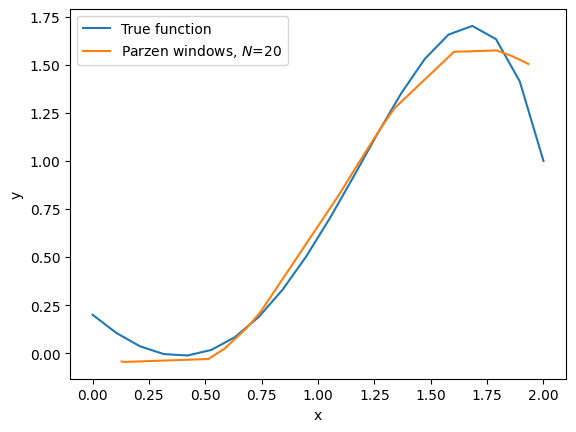

(array([0.0878353 , 0.07676697, 0.01139738, 0.04999872, 0.12919284,
        0.14550423, 0.20056885, 0.78794346, 0.81849985, 0.95596609,
        1.13568203, 1.18679346, 1.22924073, 1.29611492, 1.67628165,
        1.63100393, 1.51641587, 1.39913636, 1.32111598, 1.29021674]),
 array([-0.0433663 , -0.04534886, -0.03021564,  0.02413117,  0.12936531,
         0.15011889,  0.21809741,  0.82737244,  0.85576108,  0.98103611,
         1.13940648,  1.18335938,  1.21947179,  1.27558847,  1.56798519,
         1.57499563,  1.54808606,  1.52423613,  1.51005171,  1.50474969]))

In [101]:
exercise_6(_train_size=20, _sigma_eta_sq=0.05, _test_size=20)

For this task, we assumed the functional form of the generating model to be unknown and we used the non-parametric method Parzen Windows, that utilizes Gaussian Kernels to approximate the joint probability density p(x,y). This method estimates both the the joint probability density p(x, y) and the marginal probability density p(x) and uses the probability density functions in order to approximate the MSE optimal estimate y that is the conditional expectation of y given x, $\mathbb{E}[y \mid x]$.

The choice of bandwidth is crucial in this task since it influences the resulting estimate and we set it initially to be equal to $\frac{1}{\sqrt{N}}$. In exercise 7 we will discuss further about the different values of h we used in order to choose the optimal one which gives the lowest value of $\bar{E}$. The parzen Windows method utilizes Gaussian Kernels in order to discern the underlying pattern of the data and be able to predict values of y given a test set. Due to its non-parametric nature, this method is more flexible and relies entirely on the pattern of the data.
 


## Exercise 7

In [102]:
def experiment_1_11(x_train, y_train, x_test, plot=False):
    return exercise_1(_sigma_eta_sq=0.05, x_train=x_train, y_train=y_train, x_test=x_test, plot=plot)


def experiment_2_12(x_train, y_train, x_test, plot=False):
    return exercise_1(_sigma_eta_sq=0.05, _polynomial_degree=5, x_train=x_train, y_train=y_train, x_test=x_test,
                      plot=plot)


def experiment_3_13(x_train, y_train, x_test, plot=False):
    return exercise_1(_sigma_eta_sq=0.05, _polynomial_degree=2, x_train=x_train, y_train=y_train, x_test=x_test,
                      plot=plot)


def experiment_4_14(x_train, y_train, x_test, plot=False):
    return exercise_1(_sigma_eta_sq=0.05, _polynomial_degree=10, x_train=x_train, y_train=y_train, x_test=x_test,
                      plot=plot)


def experiment_5_15(x_train, y_train, x_test, plot=False):
    true_thetas = np.array([0.2, -1, 0.9, 0.7, -0.2])
    return exercise_3(_thetas=true_thetas, _sigma_theta_sq=0.1, _sigma_eta_sq=0.05, x_train=x_train, y_train=y_train,
                      x_test=x_test, plot=plot)


def experiment_6_16(x_train, y_train, x_test, plot=False):
    false_thetas = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])
    return exercise_3(_thetas=false_thetas, _sigma_theta_sq=0.1, _sigma_eta_sq=0.05, x_train=x_train, y_train=y_train,
                      x_test=x_test, plot=plot)


def experiment_7_17(x_train, y_train, x_test, plot=False):
    true_thetas = np.array([0.2, -1, 0.9, 0.7, -0.2])
    return exercise_3(_thetas=true_thetas, _sigma_theta_sq=2, _sigma_eta_sq=0.05, x_train=x_train, y_train=y_train,
                      x_test=x_test, plot=plot)


def experiment_8_18(x_train, y_train, x_test, plot=False):
    false_thetas = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])
    return exercise_3(_thetas=false_thetas, _sigma_theta_sq=2, _sigma_eta_sq=0.05, x_train=x_train, y_train=y_train,
                      x_test=x_test, plot=plot)


def experiment_9_19(x_train, y_train, x_test, plot=False):
    return exercise_5(x_train=x_train, y_train=y_train, x_test=x_test, plot=plot)


def experiment_10_20(x_train, y_train, x_test, h=None, plot=False):
    return exercise_6(_sigma_eta_sq=0.05, h=h, x_train=x_train, y_train=y_train, x_test=x_test, plot=plot)

In [103]:
def calculate_optimal_h(repeats=1000, train_size=20):
    # Define the range of h values in order to search for the optimal.
    h_start = 1 / (10 * np.sqrt(train_size))
    h_stop =  5 / np.sqrt(train_size)
    h_num = 30
    h_range = np.linspace(start=h_start, stop=h_stop, num=h_num)
    errors = np.zeros(len(h_range))
    
    # Perform multiple experiments to calculate errors for each h.
    for repeat in range(repeats):
        for h_idx, h in enumerate(h_range):
            y_test, y_hat = exercise_6(_train_size=train_size, h=h, _sigma_eta_sq=0.05, _test_size=20, plot=False)
            errors[h_idx] += np.mean((y_test - y_hat) ** 2)
    errors = errors / repeats

    # Plot errors as a function of h.
    plt.plot(h_range, errors, '-', label = rf'Parzen Windows Error for $N$={train_size}')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.legend()
    plt.show()
    # Return the h value that minimizes the error.
    return h_range[np.argmin(errors)]


def mse(_experiment, x_train, y_train, x_test, h=None):
    # Calculate mean squared error for a given experiment and parameters.
    # This if here is just for the cases of experiments 10, 20 where we need also this value to run these experiments
    if h:
        y_test, y_hat = _experiment(x_train, y_train, x_test, h=h)
        return np.mean((y_test - y_hat) ** 2)
    y_test, y_hat = _experiment(x_train, y_train, x_test)
    return np.mean((y_test - y_hat) ** 2)

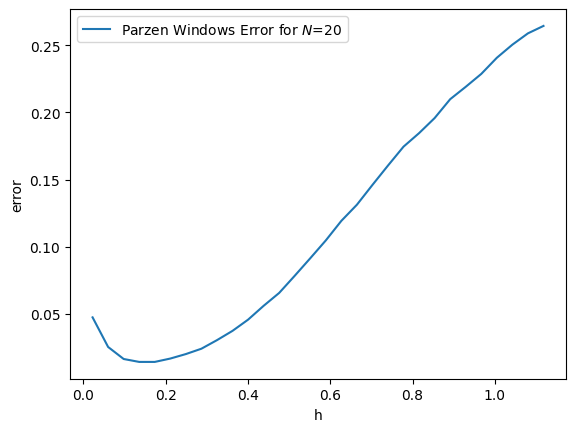

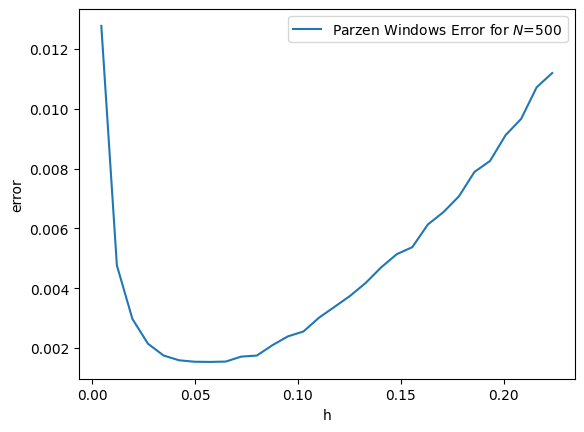

h optimal for train size=20: 0.13570619449653895
h optimal for train size=500: 0.057366709491718744
Results
Experiment 1: 0.01073699837037856
Experiment 2: 0.012721718111026896
Experiment 3: 0.06918118259745938
Experiment 4: 0.027316183145979906
Experiment 5: 0.006362734873601297
Experiment 6: 0.21770555389047075
Experiment 7: 0.008346783462929747
Experiment 8: 0.010108165568239139
Experiment 9: 0.011192756446157708
Experiment 10: 0.013981415664471954
Experiment 11: 0.0004944677603098285
Experiment 12: 0.0006028663850522003
Experiment 13: 0.05877503246355997
Experiment 14: 0.0010881675510964219
Experiment 15: 0.00038262076199552264
Experiment 16: 0.0024926843077742013
Experiment 17: 0.0004600699104173109
Experiment 18: 0.00048785797155083725
Experiment 19: 0.0004752153985959249
Experiment 20: 0.0015054009790277797


In [104]:
# List of experiments to be evaluated.
experiments = [
    experiment_1_11, experiment_2_12, experiment_3_13, experiment_4_14, experiment_5_15, experiment_6_16,
    experiment_7_17, experiment_8_18, experiment_9_19, experiment_10_20
]
# Calculate optimal parzen window size h for train sizes of 20 and 500.
h_opt_20 = calculate_optimal_h(train_size=20)
h_opt_500 = calculate_optimal_h(train_size=500)
print(f"h optimal for train size=20: {h_opt_20}")
print(f"h optimal for train size=500: {h_opt_500}")

# Number of experiments
m = 1000
_sigma_eta_sq = 0.05
# Array to store errors for all experiments
errors = np.zeros([m, 2 * len(experiments)])
for i in range(m):
    # Generate training and testing data for train size of 20.
    x_train = np.linspace(start=0, stop=2, num=20)
    y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
    x_test = produce_random_points_in_interval(0, 2, size=20)
    # j=0 for train size 20, j=1 for train size 500.
    for j in range(2):
        for idx, experiment in enumerate(experiments):
            # Special handling for Parzen window experiment.
            if idx == 9:
                h=h_opt_20
                if j==1:
                    h=h_opt_500
                errors[i, 10 * j + idx] = mse(experiment, x_train, y_train, x_test,h=h)
                continue
            # Compute MSE for the current experiment and store the error.
            errors[i, 10 * j + idx] = mse(experiment, x_train, y_train, x_test)
        # Switch to train size 500 for the next set of experiments.
        x_train = np.linspace(start=0, stop=2, num=500)
        y_train = build_y_train(x_train=x_train, noize_scale=np.sqrt(_sigma_eta_sq))
print('Results')
# Average errors across trials.
results = np.mean(errors, axis=0)
for experim in range(2 * len(experiments)):
    print(f"Experiment {experim+1}: {results[experim]}")

In order to compare the different regression methods and evaluate their performances, we performed each of the experiments M=1000 times, each time using different noise samples for our training set and sampling different random points on the x axis for the test set. We used the **Mean Squared Error Cost Function** over the points in the test set and we treated its value as a random variable, whose expectation value we estimated as the average over all M =1000 test sets. The experiments 1 through 10 were conducted on a train set comprising of 20 points, whereas the experiments 11 through 20, though identical to experiments 1 through 10 (experiment 11 corresponds to experiment 1, experiment 12 corresponds to experiment 2 and so on), were conducted on a train set comprising of 500 points. 

As demonstrated above, the smallest expectation value corresponds to experiment 5 and is achieved by applying the **Full Bayesian Inference** method, using a Gaussian prior for the unknown parameter vector Θ with mean $θ_0$ equal to the true parameter vector and covariance matrix $\Sigma_\theta = \sigma_\theta^2 I$, $\sigma_\theta^2 = 0,1$.The FBI uses prior knowledge for the unknown parameter vector Θ and especially in the experiment 5 where the adopted prior matches the true values of the unknown parameters, the model's performance and generalization ability is optimal as we achieved the minimum Error. It is therefore logical that this method provides the minimal expectation value among all the methods. The proof of the cake though, is in the eating as we can observe that the predictions of y obtained by the FBI method, are aligned the closest to the true function curve. Furthermore, the largest expectation value is obtained in the experiment 6, where we used the FBI method but the choice of the prior was carried out in a way that diverged from the true distribution of the unknown parameters significantly and therefore it is not surprising that the model performed so poorly. 

The experiments 1 through 4 were carried out using the **Least Squares** method. The expectation values that occured from these experiments indicated that the closest the model's structure was to the correct model's structure the "better" the expectation value, Although the Error is still larger than the expectation values obtained by the FBI method which makes sense since the FBI method manages to encapsulate prior knowledge to the fullest extent. Additionally, between the experiments 3 and 4, where the model's structures were incorrect, the model with the 10th degree polynomial structure performed better than the model with the 2nd degree polynomial structure, indicating that the choice for smaller bias was more critical than the choice for smaller variance. Finally in experiment 8 where FBI was applied with false prior knowledge and $\sigma_\theta^2>>\sigma_\eta^2$ and also in the case of experiment 7 where FBI was applied with the correct prior knowledge and $\sigma_\theta^2>>\sigma_\eta^2$, the Error was similar to the Error of the Least Squares method (experiment 1)- something that it also verified by the proof of **Exercise 4**.


Although the **increase in the dataset size** in experiments 11 through 20 resulted in significantly better expectation values, in comparison to their respective experiments 1 through 10, the relations between the expectation values amongst experiments 11 through 20 were relatively the same as in experiments 1 through 10. This indicates that the larger dataset size amplified the model's ability to capture better the underlying pattern of the data leading to more accurate predictions, but still did not benefit any method differently than in experiments 1 through 10. The only exception is the EM based experiment 19. The expectation value obtained by the experiment 19, where the **EM** algorithm was used, was significantly closer to the optimal expectation value obtained by the experiment 15, where the FBI method was used, compared to the expectation value of the corresponding experiment 9 and the respective optimal obtained by the experiment 5. This is no surprise since the larger dataset provided the algorithm with more information and enabled the model to capture the structure of the dataset more effectively. Regarding the larger dataset size, it should also be mentioned that the expectation values obtained by the experiments 17 and 18, where the FBI method was applied, were significantly closer to the expectation value obtained by the experiment 11 where the LS method was applied. This indicates that despite the fact that in the cases where the FBI was applied (even with false prior knowledge) , the fact that  $\sigma_\theta^2>>\sigma_\eta^2$ and the larger dataset size led the model to produce parameter estimates in a way similar to the one used in the LS method and therefore matching the behavior of the model in experiment 11 (verified by the proof of **Exercise 4**).

An additional observation is that in the case of experiments 3 and 13 (2nd degree polynomial) the Error remains roughly the same. This happens because despite the fact that the training size increases, the model's limited capacity (only 3 learnable parameters $\theta_0, \theta_1 , \theta_2$) fails  to capture additional information from the dataset. Perhaps it has already reached its maximum capacity from the trainig set that consists of 20 points

As far as the experiments 10 and 20 are concerned where the **Parzen Windows** method was used, further computations were carried out regarding the choice of the optimal bandwidth which leads to the lowest value of the expectation value. For both experiments 10 and 20 we tried 30 different values of h in a range starting from $\frac{1}{10 \cdot \sqrt{N}}$ and stoping at $\frac{5}{\sqrt{N}}$. The optimal h for the experiment 10 was ~0.136 and the optimal h for the experiment 20 was ~0.057 (The fact that these values correspond to minimum mse can also verified by the plots). 

# Problem 2

## Rice and Heart Failure Classification with k-NN and Bayes Classifiers

This notebook implements **k-Nearest Neighbors (k-NN)** and **Bayes classifiers** under various assumptions for two classification tasks:
1. **Rice Grain Classification**: Classifying rice grains into two classes (Cammeo and Osmancik) based on morphological characteristics.
2. **Heart Failure Prediction**: Classifying whether a patient has heart disease based on patient demographics, clinical symptoms, vital signs, and diagnostic test results.

The classifiers are evaluated using **k-fold cross-validation**, and their performance is compared.



### About Heart failure prediction dataset

Dataset from kaggle, [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


## **1. Loading and Preprocessing the Data**

First, we load the datasets and preprocess them for analysis.
### Rice Dataset

In [105]:
def read_arff(file_path: str) -> pd.DataFrame:
	data, _ = arff.loadarff(file_path)
	return pd.DataFrame(data)


# NOTE: To use this function we have changed "Data" into "@data" in the arff file.
rice_df = read_arff("Rice_Cammeo_Osmancik.txt" )
rice_df['Class'] = rice_df['Class'].str.decode('utf-8')
rice_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


In [106]:
print(rice_df.shape)

(3810, 8)


#### Map the classes to integers

In [107]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(rice_df['Class']))}
rice_df['Class'] = rice_df['Class'].map(class_mapping)

In [108]:
rice_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [109]:
rice_df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,1
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,1
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,1
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,1
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,1


### Heart Disease Prediction Dataset

In [110]:
heart_df = pd.read_csv("heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [111]:
print(heart_df.shape)

(918, 12)


#### Map the values of each column to numerical ones

In [112]:
sex_conv = {"M": 0, "F": 1}
cpt_conv = {"ASY": 0, "NAP": 1, "ATA": 2, "TA": 3}
ecg_conv = {"Normal": 0, "ST": 1, "LVH": 2}
exa_conv = {"N": 0, "Y": 1}
sts_conv = {"Up": -1, "Flat": 0, "Down": 1}


heart_df["Sex"] = heart_df["Sex"].map(sex_conv)
heart_df["ChestPainType"] = heart_df["ChestPainType"].map(cpt_conv)
heart_df["RestingECG"] = heart_df["RestingECG"].map(ecg_conv)
heart_df["ExerciseAngina"] = heart_df["ExerciseAngina"].map(exa_conv)
heart_df["ST_Slope"] = heart_df["ST_Slope"].map(sts_conv)

In [113]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,-1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,1,98,0,0.0,-1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,-1,0


## **2. Splitting the Data into Training and Testing Sets**
We split the datasets into training and testing sets for evaluation.

In [114]:
def split_data(
	df: pd.DataFrame, 
	test_size: float = 0.2,
	random_state: int = 42
) -> dict:
	# Shuffle the DataFrame
	df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

	# Calculate the split index
	split_idx = int((1 - test_size) * len(df))

	# Split the DataFrame
	train_df = df.iloc[:split_idx]
	test_df = df.iloc[split_idx:]

	# Get the data as numpy arrays
	X_train = train_df.iloc[:, :-1].values  
	y_train = train_df.iloc[:, -1].values

	X_test = test_df.iloc[:, :-1].values    
	y_test = test_df.iloc[:, -1].values     

	return {
		"X_train": X_train,
		"y_train": y_train,
		"X_test": X_test,
		"y_test": y_test
	}

### Split the rice dataset

In [115]:
split_result = split_data(rice_df)

X_train_rice = split_result["X_train"]
y_train_rice = split_result["y_train"]

X_test_rice = split_result["X_test"]
y_test_rice = split_result["y_test"]

### Split the heart dataset

In [116]:
split_result = split_data(heart_df)

X_train_heart = split_result["X_train"]
y_train_heart = split_result["y_train"]

X_test_heart = split_result["X_test"]
y_test_heart = split_result["y_test"]

## **3. _k_-NN Classifier**

The _k_-Nearest Neighbors _k_-NN algorithm is a widely used non-parametric method for classification and regression tasks. At its core, the algorithm relies on calculating the distance between a test sample $x$ and all training samples $x'$ using a chosen distance metric. Common metrics include the Euclidean distance, given by 
$$
d(x, x') = \sqrt{\sum_{i=1}^n \left( x_i - x'_i \right)^2},
$$
and the Manhattan distance,
$$
d(x, x') = \sum_{i=1}^n \left| x_i - x'_i \right|.
$$
For classification, the algorithm assigns the test sample $x$ to the majority class among its __k__ nearest neighbors, defined mathematically as
$$
\hat{y} = \text{arg}\max_{c \in \mathcal{C}} \sum_{i \in \mathcal{N}_k(x)} \mathbb{\boldsymbol{I}}(y_i = c),
$$
where $\mathcal{N}_k(x)$ denotes the indices of the __k__ nearest neighbors, and $\mathbb{I}$ is the indicator function. The choice of __k__ significantly affects the algorithm's performance, and cross-validation is often used to determine the optimal value.

We implement and evaluate the k-NN classifier for different values of __k__ using cross-validation.

In [117]:
class KNNClassifier:
    def __init__(self, k: int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def train(self, X_train:np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X: np.ndarray, distance_metric: str, k: int) -> np.ndarray:
        if distance_metric == 'euclidean':
            dists = np.sqrt(np.sum((X[:, np.newaxis, :] - self.X_train) ** 2, axis=2))

        else:  # Manhattan distance
            dists = np.sum(np.abs(X[:, np.newaxis, :] - self.X_train), axis=2)

        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y.extend(self.y_train[np.argsort(dists[i,:])[:k]])
            y_pred[i] = max(set(closest_y), key=closest_y.count)

        return np.array(y_pred)


### Cross Validation for _k_-NN

In [118]:
def cross_validate_knn(
    k_neighbors: int,
    distance_metric: str,
    X: np.ndarray, 
    y: np.ndarray
)-> float:
    k_folds = 5
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    
    # Split indices into k folds
    fold_indices = np.array_split(indices, k_folds)
    accuracies = []

    for i in range(k_folds):
        val_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(k_folds) if j != i])

        X_train_fold = X[train_indices]
        y_train_fold = y[train_indices]
        X_val_fold = X[val_indices]
        y_val_fold = y[val_indices]

        classifier = KNNClassifier(k=k_neighbors)
        classifier.train(X_train_fold, y_train_fold)

        predictions = classifier.predict(
            X=X_val_fold,
            distance_metric=distance_metric,
            k=k_neighbors
        )

        accuracy = np.sum(predictions == y_val_fold) / len(y_val_fold)
        accuracies.append(accuracy)

    return np.mean(accuracies)

#### _k_-NN evaluation for the ****Rice Dataset****

In [119]:
def run_knn(X_train: np.ndarray, y_train: np.ndarray, k_values_list: list[int]):
    knn_accuracies = []
    for k_neighbors in k_values_list:
        print(f"KNN with {k_neighbors} neighbors")
        for distance_metric in ['euclidean', 'manhattan']:
            average_accuracy = cross_validate_knn(
                k_neighbors,
                distance_metric,
                X_train,
                y_train
            )
            knn_accuracies.append((distance_metric, k_neighbors, average_accuracy))
            print(f"Average accuracy in rice dataset using {distance_metric} distance "
                  f"metric: {average_accuracy}")

    # Get the best hyperparameters and the highest accuracy
    best_distance_metric = max(knn_accuracies, key=lambda x: x[2])[0]
    best_k = max(knn_accuracies, key=lambda x: x[2])[1]
    highest_accuracy = max(knn_accuracies, key=lambda x: x[2])[2]

    print(f"\nHighest accuracy was: {highest_accuracy} and "
          f"was achieved with {best_k} neighbours and the "
          f"{best_distance_metric} distance metric")
    return knn_accuracies

In [120]:
def plot_knn(knn_accuracies: list[tuple], dataset_name: str)-> None:
    euclidean_accuracies = [acc for metric, k, acc in knn_accuracies if metric == 'euclidean']
    manhattan_accuracies = [acc for metric, k, acc in knn_accuracies if metric == 'manhattan']

    neighbors = [t[1] for t in knn_accuracies if t[0]=='manhattan']

    plt.figure(figsize=(10, 6))
    plt.plot(neighbors, euclidean_accuracies, marker='o', color='blue', label='Euclidean Distance')
    plt.plot(neighbors, manhattan_accuracies, marker='s', color='red', label='Manhattan Distance')

    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title(f'KNN Accuracy vs Number of Neighbors for Different Distance Metrics ({dataset_name} Dataset)')
    plt.legend()
    plt.grid(True)

    plt.show()
    return None

KNN with 3 neighbors


Average accuracy in rice dataset using euclidean distance metric: 0.8871420495841074
Average accuracy in rice dataset using manhattan distance metric: 0.9009254623273844
KNN with 5 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.887144203074107
Average accuracy in rice dataset using manhattan distance metric: 0.897640851705295
KNN with 7 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8838622843145172
Average accuracy in rice dataset using manhattan distance metric: 0.900264340897467
KNN with 9 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8825481170421815
Average accuracy in rice dataset using manhattan distance metric: 0.899935933672508
KNN with 11 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8845147917844358
Average accuracy in rice dataset using manhattan distance metric: 0.8999332418100083
KNN with 21 neighbors
Average accuracy in rice dataset using euclidea

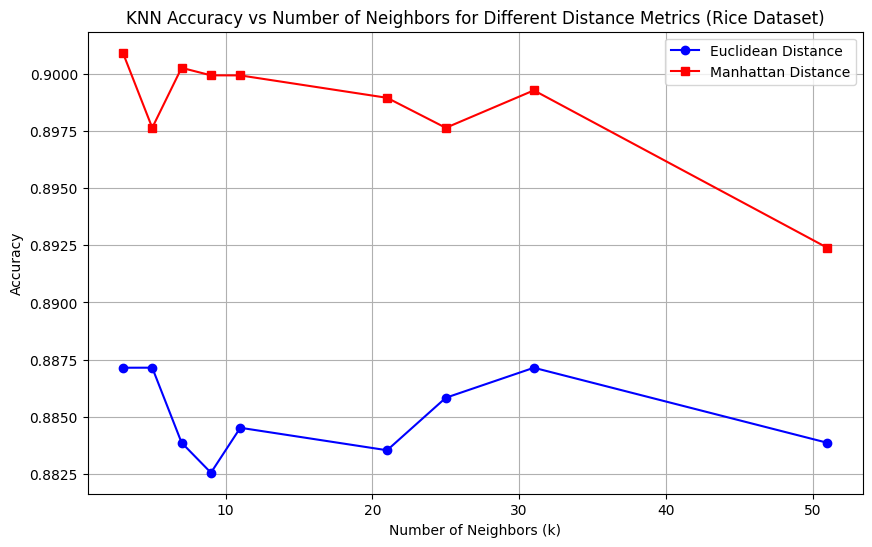

In [121]:
k_neighbors_list_rice = [3, 5, 7, 9, 11, 21, 25, 31, 51]
knn_accuracies_rice = run_knn(X_train_rice, y_train_rice, k_neighbors_list_rice)
plot_knn(knn_accuracies_rice, dataset_name='Rice')

### _k_-NN evaluation for the ****Heart Dataset****

KNN with 3 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.6757058987978752
Average accuracy in rice dataset using manhattan distance metric: 0.7057124219550834
KNN with 5 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7097474606280869
Average accuracy in rice dataset using manhattan distance metric: 0.7357003075202684
KNN with 7 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7247414034106794
Average accuracy in rice dataset using manhattan distance metric: 0.7615413288603112
KNN with 9 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7206970459416644
Average accuracy in rice dataset using manhattan distance metric: 0.7615506476563227
KNN with 11 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7207063647376759
Average accuracy in rice dataset using manhattan distance metric: 0.7533967011462119
KNN with 21 neighbors
Average accuracy in ri

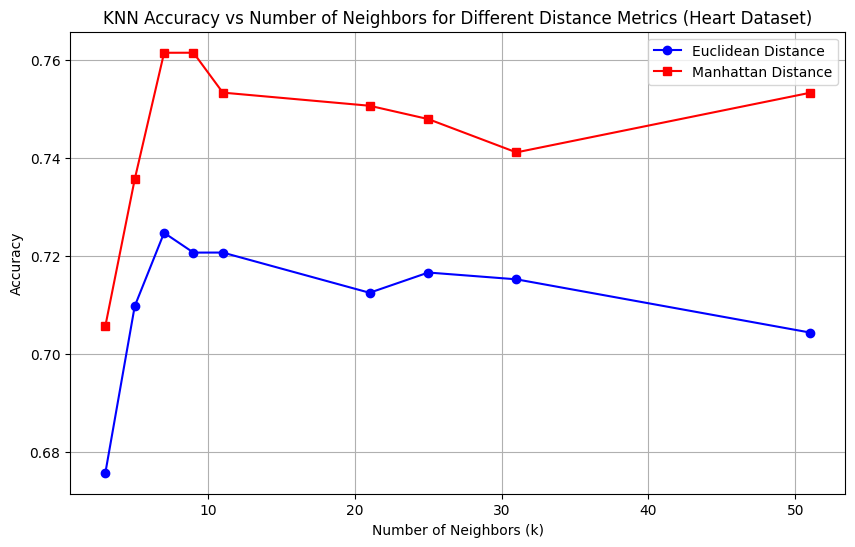

In [123]:
k_neighbors_list_heart = [3, 5, 7, 9, 11, 21, 25, 31, 51]
knn_accuracies_heart = run_knn(X_train_heart, y_train_heart, k_neighbors_list_heart)
plot_knn(knn_accuracies_heart, dataset_name='Heart')

#### Testing large _k_
We also tested the _k_-NN classifier with an extremely large number of neighbors to demonstrate how the accuracy of the algorithm is affected. As _k_ increases to a very large value, the accuracy tends to drop because the voting process becomes arbitrary, especially when the data distribution does not clearly separate the classes. If the classes are well-separated in the feature space, the accuracy may remain high even for very large _k_ values. However, when the data points from different classes overlap significantly, using a large number of neighbors for classification can lead to poor decision boundaries, as the classifier incorporates votes from distant and potentially irrelevant points. This highlights the importance of selecting an optimal _k_ value to balance sensitivity to local patterns and robustness against noise.

KNN with 101 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8864852351341893
Average accuracy in rice dataset using manhattan distance metric: 0.8887808554739024
KNN with 151 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8841896147944762
Average accuracy in rice dataset using manhattan distance metric: 0.8851737597243533
KNN with 201 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8838612075695174
Average accuracy in rice dataset using manhattan distance metric: 0.8855021669493123
KNN with 301 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8838612075695174
Average accuracy in rice dataset using manhattan distance metric: 0.8851737597243533
KNN with 501 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.8841890764219764
Average accuracy in rice dataset using manhattan distance metric: 0.8845174836469354
KNN with 701 neighbors
Average accu

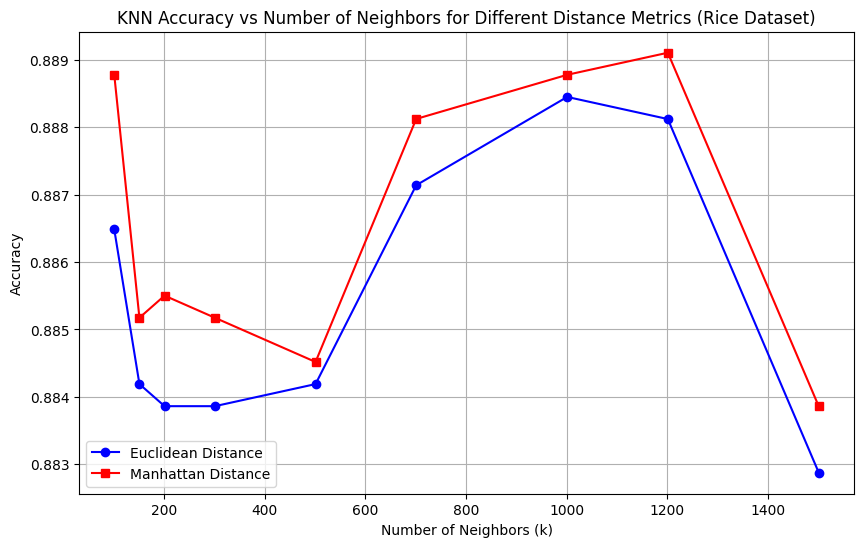

KNN with 100 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.705721740751095
Average accuracy in rice dataset using manhattan distance metric: 0.7397260273972603
KNN with 120 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7002609262883236
Average accuracy in rice dataset using manhattan distance metric: 0.7451588854719969
KNN with 140 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.7016307893020223
Average accuracy in rice dataset using manhattan distance metric: 0.7465473860777188
KNN with 200 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.6838878016960208
Average accuracy in rice dataset using manhattan distance metric: 0.7369956201658745
KNN with 250 neighbors
Average accuracy in rice dataset using euclidean distance metric: 0.693420930015842
Average accuracy in rice dataset using manhattan distance metric: 0.7383561643835617

Highest accuracy was: 0.746547386077

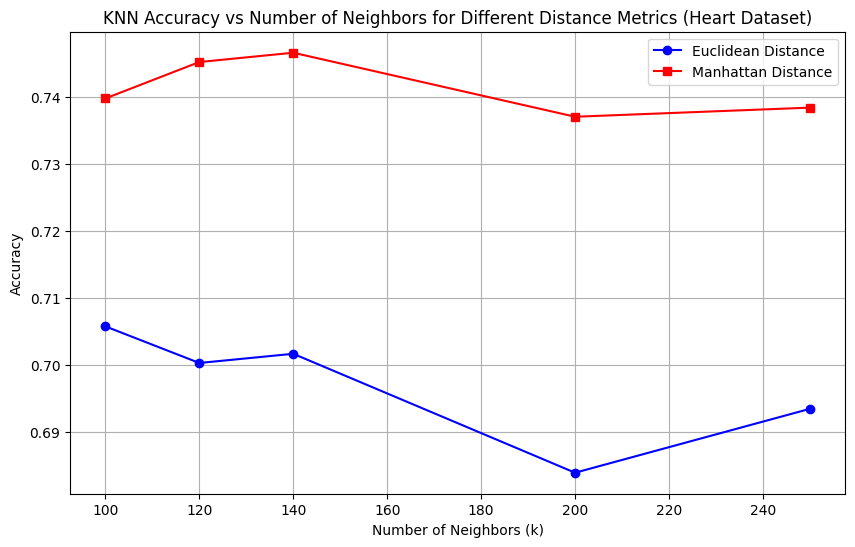

In [179]:
big_k_neighbors_list_rice = [101, 151, 201, 301, 501, 701, 1001, 1201, 1501]
big_knn_accuracies_rice = run_knn(X_train_rice, y_train_rice, big_k_neighbors_list_rice)
plot_knn(big_knn_accuracies_rice, dataset_name='Rice')

big_k_neighbors_list_heart = [100, 120, 140, 200, 250]
big_knn_accuracies_heart = run_knn(X_train_heart, y_train_heart, big_k_neighbors_list_heart)
plot_knn(big_knn_accuracies_heart, dataset_name='Heart')

---
## **4. Bayes Classifiers**


The Bayes classifier is a probabilistic model that assigns a test sample $x$ to the class $c \in \mathcal{C}$ that maximizes the posterior probability $P(c \mid x)$, computed using Bayes' theorem:
$$
P(c \mid x) = \frac{P(x \mid c) P(c)}{P(x)}
$$.
The choice of the likelihood $P(x \mid c)$ defines the specific type of Bayes classifier.

We implement and evaluate the Bayes classifiers under various assumptions. Each classifier is evaluated using k-fold cross-validation, and the results are compared to the k-NN classifier.


### **4.1 Gaussian Bayes Classifier with Diagonal Covariance Matrix**

This classifier assumes Gaussian PDFs with diagonal covariance matrices where all diagonal elements are equal.
In a Gaussian Bayes classifier with a diagonal covariance matrix, the likelihood for each class is modeled as a multivariate Gaussian distribution where the covariance matrix $\Sigma_c$ is diagonal:
$$
P(x \mid c) = \frac{1}{(2\pi)^{d/2} |\Sigma_c|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_c)^\top \Sigma_c^{-1} (x - \mu_c)\right),
$$
where $$\Sigma_c = \text{diag}(\sigma_{c,1}^2, \sigma_{c,2}^2, \dots, \sigma_{c,d}^2)$$ 

In [125]:
class GaussianBayesClassifierDiagonal:
	def __init__(self):
		self.means = {}
		self.variances = {}
		self.priors = {}

	def train(self, X: np.ndarray, y: np.ndarray) -> None:
		for c in np.unique(y):
			X_c = X[y == c]
			self.means[c] = np.mean(X_c, axis=0)

			self.variances[c] = np.var(X_c, axis=0) + 1e-9  # Add small epsilon for numerical stability
			self.priors[c] = len(X_c) / len(X)

	def _compute_gaussian_pdf(self, x: np.ndarray, mean: np.ndarray, variances: np.ndarray) -> float:
		# Calculate PDF for each feature independently
		exponent = -0.5 * np.sum((x - mean) ** 2 / variances)
		normalization = np.prod(1 / np.sqrt(2 * np.pi * variances))
		return normalization * np.exp(exponent)

	def predict(self, X: np.ndarray) -> np.ndarray:
		predictions = []
		for x in X:
			posteriors = []
			for c in self.means:
				likelihood = self._compute_gaussian_pdf(x, self.means[c], self.variances[c])
				posterior = likelihood * self.priors[c]
				posteriors.append(posterior)
			predictions.append(np.argmax(posteriors))
		return np.array(predictions)

### **4.2 Gaussian Bayes Classifier with Non-Diagonal Covariance Matrix**

This classifier assumes Gaussian PDFs with full (non-diagonal) covariance matrices.

If the covariance matrix is non-diagonal, the full covariance structure is captured, allowing dependencies between features:
$$
P(x \mid c) = \frac{1}{(2\pi)^{d/2} |\Sigma_c|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_c)^\top \Sigma_c^{-1} (x - \mu_c)\right),
$$
where $\Sigma_c$ is a positive definite matrix. 

In [126]:
class GaussianBayesClassifierNonDiagonal:
	def __init__(self):
		self.means = {}
		self.covariances = {}
		self.priors = {}

	def _compute_mean(self, X: np.ndarray) -> np.ndarray:
		return np.mean(X, axis=0)

	def _compute_covariance(self, X: np.ndarray, mean: np.ndarray) -> np.ndarray:
		N = X.shape[0]
		X_centered = X - mean
		covariance = (X_centered.T @ X_centered) / N
		return covariance

	def _compute_gaussian_pdf(
		self,
	 	x: np.ndarray,
	  	mean: np.ndarray,
	   	covariance: np.ndarray
	) -> float:
		d = len(x)
		x_centered = x - mean
		inv_covariance = np.linalg.inv(covariance)
		exponent = -0.5 * (x_centered.T @ inv_covariance @ x_centered)
		normalization = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))
		return normalization * np.exp(exponent)

	def train(self, X: np.ndarray, y: np.ndarray) -> None:
		classes = np.unique(y)
		for c in classes:
			X_c = X[y == c]
			self.means[c] = self._compute_mean(X_c)
			self.covariances[c] = self._compute_covariance(X_c, self.means[c])
			self.priors[c] = X_c.shape[0] / X.shape[0]

	def predict(self, X: np.ndarray) -> np.ndarray:
		predictions = []
		for x in X:
			posteriors = []
			for c in self.means:
				mean = self.means[c]
				covariance = self.covariances[c]
				likelihood = self._compute_gaussian_pdf(x, mean, covariance)
				posterior = likelihood * self.priors[c]
				posteriors.append(posterior)
			predictions.append(np.argmax(posteriors))
		return np.array(predictions)

### **4.3 Naïve Bayes with Gaussian Marginal PDFs**

The Naive Bayes classifier simplifies computation by assuming feature independence, and marginal the PDFs are Gaussian which allows the likelihood to be expressed as a product of marginal probabilities. For Gaussian marginal distributions, we have:
$$
P(x \mid c) = \prod_{i=1}^d \frac{1}{\sqrt{2\pi} \sigma_{c,i}} \exp\left(-\frac{1}{2} \left(\frac{x_i - \mu_{c,i}}{\sigma_{c,i}}\right)^2\right).
$$

In [127]:
class NaiveBayesGaussian:
	def __init__(self):
		self.means = {}
		self.variances = {}
		self.priors = {}

	def _compute_gaussian_pdf(
	 	self,
	  	x: float,
	   	mean: float,
		variance: float
	) -> float:
		return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

	def train(self, X: np.ndarray, y: np.ndarray) -> None:
		classes = np.unique(y)
		for c in classes:
			X_c = X[y == c]
			self.means[c] = np.mean(X_c, axis=0)
			self.variances[c] = np.var(X_c, axis=0)
			self.priors[c] = X_c.shape[0] / X.shape[0]

	def predict(self, X: np.ndarray) -> np.ndarray:
		predictions = []
		for x in X:
			posteriors = []
			for c in self.means:
				likelihood = 1.0
				for i in range(len(x)):
					likelihood *= self._compute_gaussian_pdf(x[i], self.means[c][i], self.variances[c][i])
				posterior = likelihood * self.priors[c]
				posteriors.append(posterior)
			predictions.append(np.argmax(posteriors))
		return np.array(predictions)

### **4.4 Naïve Bayes with Parzen Windows**

This classifier assumes that features are statistically independent, and marginal PDFs are estimated using Parzen windows with Gaussian kernels which approximates $P(x_i \mid c)$ as a sum of kernel functions centered at the training data points.

In [128]:
class NaiveBayesParzen:
	def __init__(self, h: float = None):
		self.h = h
		self.classes = None
		self.priors = {}
		self.features_by_class = {}

	def _compute_parzen_window_density(
	 	self,
	  	x: np.ndarray,
	   	samples: np.ndarray
	) -> float:
		n, d = samples.shape
		kernel = 1.0
		for i in range(d):
			feature_kernel = np.sum(
				np.exp(-0.5 * ((x[i] - samples[:, i]) / self.h) ** 2)
			)
			kernel *= feature_kernel
		normalization = (n * (self.h ** d) * (2 * np.pi) ** (d / 2))
		return kernel / normalization

	def train(self, X: np.ndarray, y: np.ndarray) -> None:
		self.classes, counts = np.unique(y, return_counts=True)
		# Compute priors
		self.priors = {cls: count / len(y) for cls, count in zip(self.classes, counts)}

		# Store features by class
		for cls in self.classes:
			self.features_by_class[cls] = X[y == cls]

	def predict(self, X: np.ndarray) -> np.ndarray:
		predictions = []
		for x in X:
			log_posteriors = {}
			for unique_class in self.classes:
				# We add epsilon for numerical stability
				log_likelihood = np.log(
					self._compute_parzen_window_density(x, self.features_by_class[unique_class]) + 1e-10
				)
				log_prior = np.log(self.priors[unique_class])
				log_posteriors[unique_class] = log_likelihood + log_prior
			predictions.append(max(log_posteriors, key=log_posteriors.get))
		return np.array(predictions)

### **4.5 Gaussian Mixture Bayes Classifier**


For more complex data distributions, a Gaussian Mixture Bayes classifier models $P(x \mid c)$ as a mixture of $M_c$ Gaussian components:
$$
P(x \mid c) = \sum_{j=1}^{M_c} \pi_{c,j} \frac{1}{(2\pi)^{d/2} |\Sigma_{c,j}|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_{c,j})^\top \Sigma_{c,j}^{-1} (x - \mu_{c,j})\right),
$$
where $\pi_{c,j}$ are the mixture weights, $\mu_{c,j}$ are the means, and $\Sigma_{c,j}$ are the covariance matrices. The optimal number of components $M_c$ for each class is typically determined using the Bayesian Information Criterion (BIC), balancing model complexity and goodness-of-train.

First we implement the GaussianMixture class which will be used by the Classifier below.

In [129]:
class GaussianMixture:
    def __init__(self, n_components: int, max_iter: int = 100, tol: float = 1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means = None
        self.covariances = None
        self.weights = None

    def fit(self, X: np.ndarray):
        n_samples, n_features = X.shape

        self.weights = np.ones(self.n_components) / self.n_components
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = [np.eye(n_features) for _ in range(self.n_components)]

        log_likelihood = 0
        for _ in range(self.max_iter):
            # E-step
            responsibilities = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                try:
                    responsibilities[:, k] = (self.weights[k]
                        ) * multivariate_normal.pdf(
                        X, mean=self.means[k], cov=self.covariances[k]
                    )
                except:
                    # Added for numerical stability, it will not work otherwise
                    responsibilities[:, k] = 1e-6

            responsibilities /= responsibilities.sum(axis=1, keepdims=True)

            # M-step
            Nk = responsibilities.sum(axis=0)
            self.weights = Nk / n_samples
            self.means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = np.dot(
                    responsibilities[:, k] * diff.T, diff
                ) / Nk[k] + 1e-6 * np.eye(n_features)

            # Convergence check
            new_log_likelihood = self._compute_log_likelihood(X)
            if np.abs(new_log_likelihood - log_likelihood) < self.tol:
                break
            log_likelihood = new_log_likelihood

    def _compute_log_likelihood(self, X: np.ndarray) -> float:
        log_likelihood = 0
        for k in range(self.n_components):
            log_likelihood += self.weights[k] * multivariate_normal.pdf(
                X,
                mean=self.means[k],
                cov=self.covariances[k]
            )
        return np.log(log_likelihood + 1e-6).sum()

    def score_samples(self, X: np.ndarray) -> np.ndarray:
        log_prob = np.zeros(X.shape[0])
        for k in range(self.n_components):
            log_prob += self.weights[k] * multivariate_normal.pdf(
                X,
                mean=self.means[k],
                cov=self.covariances[k]
            )
        return np.log(log_prob + 1e-6)

Then we implement the classifier which uses the model above.

In [130]:
class GaussianMixtureClassifier:
    def __init__(self, max_components: int = 10):
        self.max_components = max_components
        self.models = {}

    def train(self, X: np.ndarray, y: np.ndarray) -> None:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        self.classes = np.unique(y)

        for cls in self.classes:
            X_cls = X[y == cls]
            models = []
            bics = []

            for n in range(1, self.max_components + 1):
                gmm = GaussianMixture(n_components=n)
                gmm.fit(X_cls)
                bic = self._compute_bic(gmm, X_cls)
                models.append(gmm)
                bics.append(bic)

            # Lowest BIC model
            best_model = models[np.argmin(bics)]
            self.models[cls] = best_model

    def _compute_bic(self, gmm: GaussianMixture, X: np.ndarray) -> float:
        n_samples, n_features = X.shape
        n_params = gmm.n_components * (
            1 + n_features + n_features * (n_features + 1
                                           ) // 2) - 1
        log_likelihood = gmm._compute_log_likelihood(X)
        return -2 * log_likelihood + n_params * np.log(n_samples)

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        predictions = []
        for x in X:
            log_likelihoods = {}
            for cls, model in self.models.items():
                log_likelihoods[cls] = model.score_samples(x.reshape(1, -1))

            # Highest log-likelihood class
            predicted_class = max(log_likelihoods, key=log_likelihoods.get)
            predictions.append(predicted_class)

        return np.array(predictions)

### **k-Fold Cross-Validation for Bayes Classifiers**

We evaluate each Bayes classifier using k-fold cross-validation.

Since the first three classifiers have no hyperparameters, and the last two have different ones, the Cross-Validation procedure will be different for the three groups.

In [131]:
def k_fold_cross_validation_without_hyperparameters(
    X,
    y,
    classifier_class,
    random_state=42
):
    # We will be use 5-fold cross validation
    k = 5
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))

    # Split data into k folds
    fold_indices = np.array_split(indices, k)
    accuracies = []

    for i in range(k):
        test_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(k) if j != i])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        model = classifier_class()
        model.train(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    average_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    return accuracies, average_accuracy, std_accuracy

### k-Fold Cross-Validation function for:
- Naïve Bayes with Parzen Windows

In [132]:
def k_fold_cross_validation_bayes_parzen(
    X,
    y,
    h: float
):
    k = 5
    np.random.seed(42)
    indices = np.random.permutation(len(X))

    # Use array_split for handling uneven splits
    fold_indices = np.array_split(indices, k)
    accuracies = []

    for i in range(k):
        test_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(k) if j != i])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model = NaiveBayesParzen(h=h)
        model.train(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    average_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    return accuracies, average_accuracy, std_accuracy

### k-Fold Cross-Validation function for:
- Gaussian Mixture Bayes Classifier

In [133]:
def k_fold_cross_validation_bayes_mixture(
    X,
    y,
    max_components: int
):
    k = 5
    np.random.seed(42)
    indices = np.random.permutation(len(X))

    # Use array_split to handle uneven divisions
    fold_indices = np.array_split(indices, k)
    accuracies = []

    for i in range(k):
        test_indices = fold_indices[i]
        train_indices = np.concatenate([fold_indices[j] for j in range(k) if j != i])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model = GaussianMixtureClassifier(max_components=max_components)
        model.train(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    average_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    return accuracies, average_accuracy, std_accuracy

### We perform Cross-Validation for the Bayes Classifiers
#### ***Rice dataset***:

In [134]:
# This will be appended with the highest accuracy in the rice dataset for each Bayes classifier
classifier_accuracy_rice = {'knn_Classifier': max(knn_accuracies_rice, key=lambda x: x[2])[2]}
print(classifier_accuracy_rice)

{'knn_Classifier': np.float64(0.9009254623273844)}


In [135]:
classifiers_without_hyperparameters = {
	"Diagonal Covariance Matrix": GaussianBayesClassifierDiagonal,
	"Non-Diagonal Covariance Matrix": GaussianBayesClassifierNonDiagonal,
	"Naïve Bayes with Gaussian Marginal PDFs": NaiveBayesGaussian,
}

# Perform cross-validation for the first three classifiers
for description, classifier in classifiers_without_hyperparameters.items():
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_without_hyperparameters(
		X_train_rice,
		y_train_rice,
		classifier
	)
	classifier_accuracy_rice[description] = avg_accuracy

	print(f"Results for {description} in Rice Dataset:")
	print("Accuracies for each fold:", [f"{acc:.4f}" for acc in accuracies])
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}\n")

Results for Diagonal Covariance Matrix in Rice Dataset:
Accuracies for each fold: ['0.9262', '0.9230', '0.9082', '0.9113', '0.9327']
Average Accuracy: 0.9203
Standard Deviation: 0.0092

Results for Non-Diagonal Covariance Matrix in Rice Dataset:
Accuracies for each fold: ['0.9230', '0.9213', '0.9377', '0.9212', '0.9327']
Average Accuracy: 0.9272
Standard Deviation: 0.0068

Results for Naïve Bayes with Gaussian Marginal PDFs in Rice Dataset:
Accuracies for each fold: ['0.9262', '0.9230', '0.9082', '0.9113', '0.9327']
Average Accuracy: 0.9203
Standard Deviation: 0.0092



#### Next, Bayes Classifier with Parzen windows


Results for Naïve Bayes with Parzen Windows (h=0.1) in Rice Dataset:
Accuracies for each fold: ['0.5902', '0.6049', '0.5754', '0.5649', '0.5731']
Average Accuracy: 0.5817
Standard Deviation: 0.0142


Results for Naïve Bayes with Parzen Windows (h=0.5) in Rice Dataset:
Accuracies for each fold: ['0.7967', '0.7934', '0.7689', '0.7833', '0.7931']
Average Accuracy: 0.7871
Standard Deviation: 0.0102


Results for Naïve Bayes with Parzen Windows (h=1.0) in Rice Dataset:
Accuracies for each fold: ['0.8656', '0.8574', '0.8311', '0.8539', '0.8621']
Average Accuracy: 0.8540
Standard Deviation: 0.0121


Results for Naïve Bayes with Parzen Windows (h=2.0) in Rice Dataset:
Accuracies for each fold: ['0.9016', '0.8885', '0.8738', '0.8801', '0.8933']
Average Accuracy: 0.8875
Standard Deviation: 0.0098


Results for Naïve Bayes with Parzen Windows (h=5.0) in Rice Dataset:
Accuracies for each fold: ['0.9082', '0.9049', '0.8967', '0.8933', '0.9080']
Average Accuracy: 0.9022
Standard Deviation: 0.0061



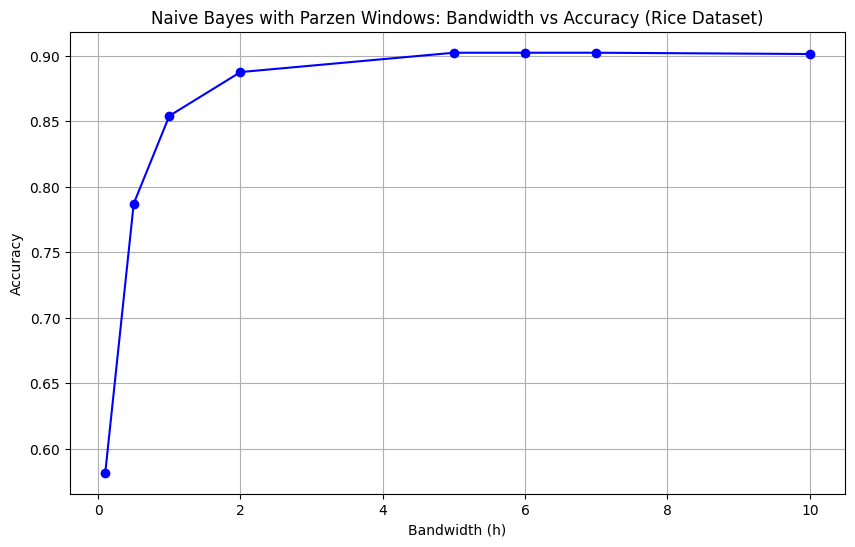

In [136]:
# Perform cross-validation for Naive Bayes Classifier with Parzen Windows
h_values = [0.1, 0.5, 1.0, 2.0, 5.0, 6.0, 7.0, 10]
h_to_accuracies = {}
for h in h_values:
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_bayes_parzen(
		X_train_rice,
		y_train_rice,
		h
	)
	h_to_accuracies[h] = avg_accuracy
	print(f"\nResults for Naïve Bayes with Parzen Windows (h={h}) in Rice Dataset:")
	print("Accuracies for each fold:", [f"{acc:.4f}" for acc in accuracies])
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}\n")

best_h = max(h_to_accuracies, key=h_to_accuracies.get)
best_accuracy = h_to_accuracies[best_h]

classifier_accuracy_rice["Naïve Bayes with Parzen Windows"] = best_accuracy

print(f"The best accuracy was {best_accuracy} and was achieved with h={best_h}")

plt.figure(figsize=(10, 6))
plt.plot(h_values, list(h_to_accuracies.values()), marker='o', linestyle='-', color='b')

plt.xlabel('Bandwidth (h)')
plt.ylabel('Accuracy')
plt.title('Naive Bayes with Parzen Windows: Bandwidth vs Accuracy (Rice Dataset)')
plt.grid(True)

plt.show()

#### Finally, Gaussian Mixture Classifier


Results for Gaussian Mixture Classifier (max_components=1) in Rice Dataset:
Average Accuracy: 0.9206
Standard Deviation: 0.0098


Results for Gaussian Mixture Classifier (max_components=2) in Rice Dataset:
Average Accuracy: 0.9190
Standard Deviation: 0.0148


Results for Gaussian Mixture Classifier (max_components=3) in Rice Dataset:
Average Accuracy: 0.8651
Standard Deviation: 0.0465


Results for Gaussian Mixture Classifier (max_components=4) in Rice Dataset:
Average Accuracy: 0.7959
Standard Deviation: 0.0753


Results for Gaussian Mixture Classifier (max_components=5) in Rice Dataset:
Average Accuracy: 0.7483
Standard Deviation: 0.1052


Results for Gaussian Mixture Classifier (max_components=6) in Rice Dataset:
Average Accuracy: 0.7460
Standard Deviation: 0.1023


Results for Gaussian Mixture Classifier (max_components=7) in Rice Dataset:
Average Accuracy: 0.7214
Standard Deviation: 0.1091


Results for Gaussian Mixture Classifier (max_components=8) in Rice Dataset:
Average Accur

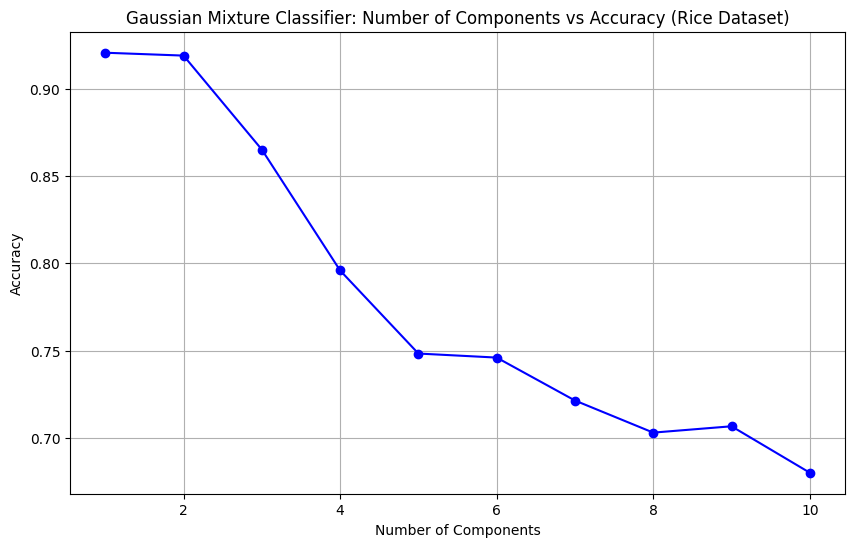

In [137]:
max_components_values = [1, 2, 3, 4, 5 , 6, 7, 8, 9, 10]
max_components_to_accuracies = {}

for max_component in max_components_values:
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_bayes_mixture(
		X_train_rice,
		y_train_rice,
		max_component
	)
	print(f"\nResults for Gaussian Mixture Classifier (max_components={max_component}) in Rice Dataset:")
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}\n")
	max_components_to_accuracies[max_component] = avg_accuracy

best_max_component = max(max_components_to_accuracies, key=max_components_to_accuracies.get)
best_accuracy = max_components_to_accuracies[best_max_component]

classifier_accuracy_rice["Gaussian Mixture Classifier"] = best_accuracy

print(f"The best accuracy was {best_accuracy} and was achieved with max_components={best_max_component}")

plt.figure(figsize=(10, 6))
plt.plot(max_components_values, list(max_components_to_accuracies.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Gaussian Mixture Classifier: Number of Components vs Accuracy (Rice Dataset)')
plt.grid(True)

plt.show()

#### ***Heart dataset***

In [138]:
# This will be appended with the highest accuracy in the heart dataset for each Bayes classifier
classifier_accuracy_heart = {'knn_Classifier': max(knn_accuracies_heart, key=lambda x: x[2])[2]}
print(classifier_accuracy_heart)

{'knn_Classifier': np.float64(0.7615506476563227)}


##### Again, we begin with the Bayes Classifiers without hyperparameters

In [139]:
# Perform cross-validation for each classifier
for description, classifier in classifiers_without_hyperparameters.items():
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_without_hyperparameters(
		X_train_heart,
		y_train_heart,
		classifier
	)
	classifier_accuracy_heart[description] = avg_accuracy
	print(f"Results for {description} in Rice Dataset:")
	print("Accuracies for each fold:", [f"{acc:.4f}" for acc in accuracies])
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}")

Results for Diagonal Covariance Matrix in Rice Dataset:
Accuracies for each fold: ['0.8844', '0.8435', '0.8844', '0.8095', '0.8219']
Average Accuracy: 0.8487
Standard Deviation: 0.0311
Results for Non-Diagonal Covariance Matrix in Rice Dataset:
Accuracies for each fold: ['0.8435', '0.8571', '0.8776', '0.7823', '0.8219']
Average Accuracy: 0.8365
Standard Deviation: 0.0326
Results for Naïve Bayes with Gaussian Marginal PDFs in Rice Dataset:
Accuracies for each fold: ['0.8844', '0.8435', '0.8844', '0.8095', '0.8219']
Average Accuracy: 0.8487
Standard Deviation: 0.0311


##### We continue with the Bayes Classifier with Parzen windows


Results for Naïve Bayes with Parzen Windows (h=0.1) in Rice Dataset:
Accuracies for each fold: ['0.6803', '0.6531', '0.6871', '0.7551', '0.7603']
Average Accuracy: 0.7072
Standard Deviation: 0.0428


Results for Naïve Bayes with Parzen Windows (h=0.2) in Rice Dataset:
Accuracies for each fold: ['0.6803', '0.6871', '0.7007', '0.7551', '0.7534']
Average Accuracy: 0.7153
Standard Deviation: 0.0325


Results for Naïve Bayes with Parzen Windows (h=0.3) in Rice Dataset:
Accuracies for each fold: ['0.7483', '0.7075', '0.7483', '0.7619', '0.8014']
Average Accuracy: 0.7535
Standard Deviation: 0.0301


Results for Naïve Bayes with Parzen Windows (h=0.4) in Rice Dataset:
Accuracies for each fold: ['0.7551', '0.7415', '0.7619', '0.7483', '0.8014']
Average Accuracy: 0.7616
Standard Deviation: 0.0210


Results for Naïve Bayes with Parzen Windows (h=0.5) in Rice Dataset:
Accuracies for each fold: ['0.7415', '0.7551', '0.7687', '0.7551', '0.7945']
Average Accuracy: 0.7630
Standard Deviation: 0.0180



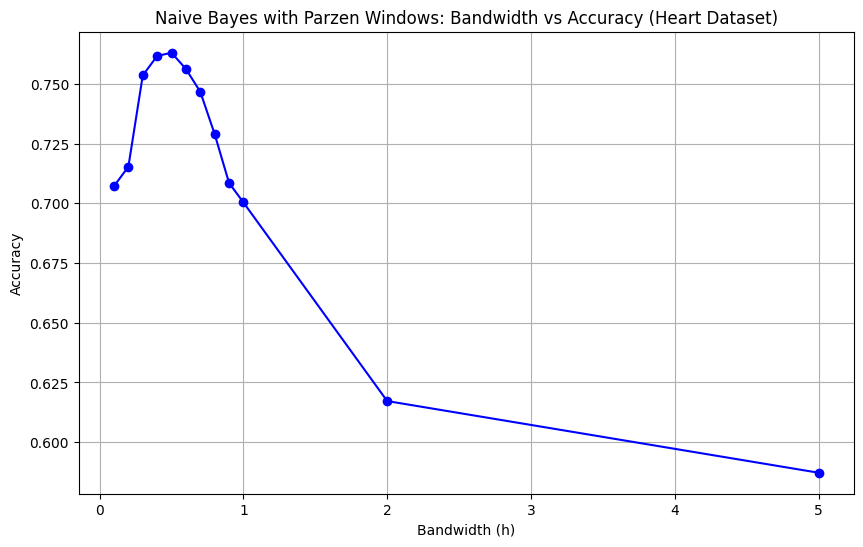

In [140]:
# Perform cross-validation for Naive Bayes Classifier with Parzen Windows
h_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0]
h_to_accuracies = {}
for h in h_values:
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_bayes_parzen(
		X_train_heart,
		y_train_heart,
		h
	)
	h_to_accuracies[h] = avg_accuracy
	print(f"\nResults for Naïve Bayes with Parzen Windows (h={h}) in Rice Dataset:")
	print("Accuracies for each fold:", [f"{acc:.4f}" for acc in accuracies])
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}\n")

best_h = max(h_to_accuracies, key=h_to_accuracies.get)
best_accuracy = h_to_accuracies[best_h]

classifier_accuracy_heart["Naïve Bayes with Parzen Windows"] = best_accuracy

print(f"The best accuracy was {best_accuracy} and was achieved with h={best_h}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(h_values, list(h_to_accuracies.values()), marker='o', linestyle='-', color='b')

plt.xlabel('Bandwidth (h)')
plt.ylabel('Accuracy')
plt.title('Naive Bayes with Parzen Windows: Bandwidth vs Accuracy (Heart Dataset)')
plt.grid(True)

plt.show()

#### Finally, Gaussian Mixture Classifier


Results for Gaussian Mixture Classifier (max_components=1) in Heart Dataset:
Average Accuracy: 0.8338
Standard Deviation: 0.0184


Results for Gaussian Mixture Classifier (max_components=2) in Heart Dataset:
Average Accuracy: 0.4128
Standard Deviation: 0.0454


Results for Gaussian Mixture Classifier (max_components=3) in Heart Dataset:
Average Accuracy: 0.5041
Standard Deviation: 0.0429


Results for Gaussian Mixture Classifier (max_components=4) in Heart Dataset:
Average Accuracy: 0.4358
Standard Deviation: 0.0495


Results for Gaussian Mixture Classifier (max_components=5) in Heart Dataset:
Average Accuracy: 0.4959
Standard Deviation: 0.0669


Results for Gaussian Mixture Classifier (max_components=6) in Heart Dataset:
Average Accuracy: 0.4495
Standard Deviation: 0.0403


Results for Gaussian Mixture Classifier (max_components=7) in Heart Dataset:
Average Accuracy: 0.4332
Standard Deviation: 0.0220


Results for Gaussian Mixture Classifier (max_components=8) in Heart Dataset:
Avera

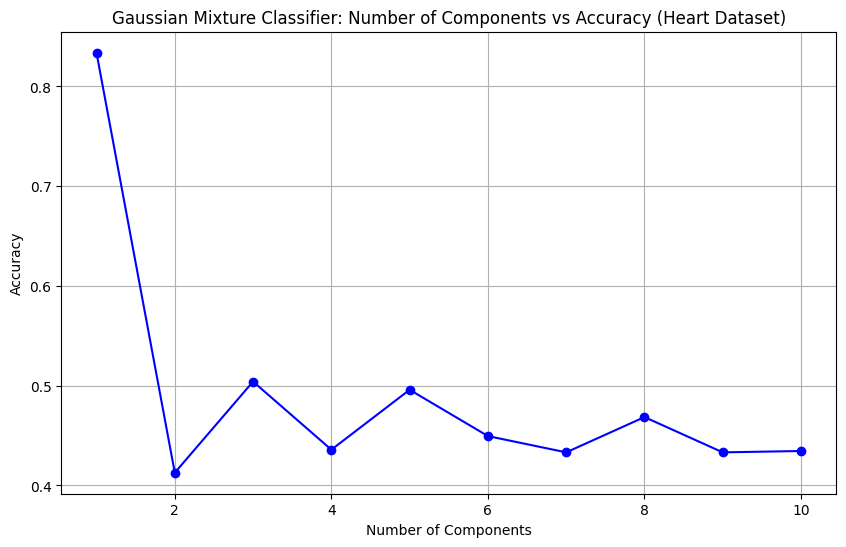

In [141]:
max_components_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_components_to_accuracies = {}

for max_component in max_components_values:
	accuracies, avg_accuracy, std_accuracy = k_fold_cross_validation_bayes_mixture(
		X_train_heart,
		y_train_heart,
		max_component
	)
	print(f"\nResults for Gaussian Mixture Classifier (max_components={max_component}) in Heart Dataset:")
	print(f"Average Accuracy: {avg_accuracy:.4f}")
	print(f"Standard Deviation: {std_accuracy:.4f}\n")
	max_components_to_accuracies[max_component] = avg_accuracy

best_max_component = max(max_components_to_accuracies, key=max_components_to_accuracies.get)
best_accuracy = max_components_to_accuracies[best_max_component]

classifier_accuracy_heart["Gaussian Mixture Classifier"] = best_accuracy

print(f"The best accuracy was {best_accuracy} and was achieved with max_components={best_max_component}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_components_values, list(max_components_to_accuracies.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Gaussian Mixture Classifier: Number of Components vs Accuracy (Heart Dataset)')
plt.grid(True)

plt.show()

<h5>The best hyperparameters for the <strong>Rice Dataset</strong> are:</h5>
<table border="1">
    <thead>
        <tr>
            <th>Classifier</th>
            <th>Hyperparameter</th>
            <th>Value</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Naive Bayes with Parzen Windows</td>
            <td><i>h</i></td>
            <td>6</td>
            <td>Bandwidth</td>
        </tr>
        <tr>
            <td>Gaussian Mixture Bayes Classifier</td>
            <td><i>n</i></td>
            <td>1</td>
            <td>Number of components</td>
        </tr>
        <tr>
            <td rowspan="2">KNN-Classifier</td>
            <td><i>k</i></td>
            <td>3</td>
            <td>Number of neighbors</td>
        </tr>
        <tr>
            <td><i>d</i></td>
            <td>Manhattan Distance</td>
            <td>Distance metric</td>
        </tr>
    </tbody>
</table>

<h5>The best hyperparameters for the <strong>Heart Dataset</strong> are:</h5>
<table border="1">
    <thead>
        <tr>
            <th>Classifier</th>
            <th>Hyperparameter</th>
            <th>Value</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Naive Bayes with Parzen Windows</td>
            <td><i>h</i></td>
            <td>0.5</td>
            <td>Bandwidth</td>
        </tr>
        <tr>
            <td>Gaussian Mixture Bayes Classifier</td>
            <td><i>n</i></td>
            <td>1</td>
            <td>Number of components</td>
        </tr>
        <tr>
            <td rowspan="2">KNN-Classifier</td>
            <td><i>k</i></td>
            <td>9</td>
            <td>Number of neighbors</td>
        </tr>
        <tr>
            <td><i>d</i></td>
            <td>Manhattan Distance</td>
            <td>Distance metric</td>
        </tr>
    </tbody>
</table>


#### Using the above hyperparameters, **we evaluate the classifiers on the test set**

In [178]:
classifiers = {
    "KNN Classifier": KNNClassifier,
    "Gaussian Bayes Classifier with Diagonal Covariance Matrix": GaussianBayesClassifierDiagonal,
    "Gaussian Bayes Classifier with Non-Diagonal Covariance Matrix": GaussianBayesClassifierNonDiagonal,
    "Naive Bayes with Gaussian Marginal PDFs": NaiveBayesGaussian,
    "Naive Bayes with Parzen Windows": NaiveBayesParzen,
    "Gaussian Mixture Classifier": GaussianMixtureClassifier
}

def get_classifier_accuracies_dict(
    best_k: int,
    best_distance_metric: str,
    best_h: float,
    best_max_component: int,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_test: np.ndarray,
    y_test: np.ndarray,
    dataset: str
) -> dict:
    accuracies_dict = {}

    for description, classifier in classifiers.items():
        if description == "KNN Classifier":
            model = classifier(k=best_k)
            model.train(X_train, y_train)
            y_pred = model.predict(
                X_test,
                distance_metric=best_distance_metric,
                k=best_k
            )
            accuracy = np.mean(y_pred == y_test)
            accuracies_dict[description] = accuracy
            print(f"Accuracy for {description} in {dataset} Dataset: {accuracy:.2f}")

        elif description == "Naive Bayes with Parzen Windows":
            model = classifier(h=best_h)
            model.train(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = np.mean(y_pred == y_test)
            accuracies_dict[description] = accuracy
            print(f"Accuracy for {description} in {dataset} Dataset: {accuracy:.2f}")

        elif description == "Gaussian Mixture Classifier":
            model = classifier(max_components=best_max_component)
            model.train(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = np.mean(y_pred == y_test)
            accuracies_dict[description] = accuracy
            print(f"Accuracy for {description} in {dataset} Dataset: {accuracy:.2f}")

        else:
            model = classifier()
            model.train(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = np.mean(y_pred == y_test)
            accuracies_dict[description] = accuracy
            print(f"Accuracy for {description} in {dataset} Dataset: {accuracy:.2f}")
    return accuracies_dict


test_set_classifier_accuracy_rice = get_classifier_accuracies_dict(
    best_k=3,
    best_distance_metric='manhattan',
    best_h=6,
    best_max_component=1,
    X_train=X_train_rice,
    y_train=y_train_rice,
    X_test=X_test_rice,
    y_test=y_test_rice,
    dataset="Rice"
)
test_set_classifier_accuracy_heart = get_classifier_accuracies_dict(
    best_k=9,
    best_distance_metric='manhattan',
    best_h=0.5,
    best_max_component=1,
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    dataset="Heart"
)

Accuracy for KNN Classifier in Rice Dataset: 0.88
Accuracy for Gaussian Bayes Classifier with Diagonal Covariance Matrix in Rice Dataset: 0.90
Accuracy for Gaussian Bayes Classifier with Non-Diagonal Covariance Matrix in Rice Dataset: 0.92
Accuracy for Naive Bayes with Gaussian Marginal PDFs in Rice Dataset: 0.90
Accuracy for Naive Bayes with Parzen Windows in Rice Dataset: 0.89
Accuracy for Gaussian Mixture Classifier in Rice Dataset: 0.90
Accuracy for KNN Classifier in Heart Dataset: 0.73
Accuracy for Gaussian Bayes Classifier with Diagonal Covariance Matrix in Heart Dataset: 0.86
Accuracy for Gaussian Bayes Classifier with Non-Diagonal Covariance Matrix in Heart Dataset: 0.86
Accuracy for Naive Bayes with Gaussian Marginal PDFs in Heart Dataset: 0.86
Accuracy for Naive Bayes with Parzen Windows in Heart Dataset: 0.72
Accuracy for Gaussian Mixture Classifier in Heart Dataset: 0.86


---

## **5. Comparison of Classifiers**

We compare the performance of all classifiers, i.e. k-NN and the Bayes classifiers.

In [175]:
def show_results(classifier_accuracy: dict, dataset_name: str):
	df = pd.DataFrame.from_dict(classifier_accuracy, orient='index', columns=['Accuracy'])
	plt.figure(figsize=(12, 10))

	bars = plt.bar(df.index, df['Accuracy'], color='skyblue', alpha=0.8)
	plt.axhline(y=max(df['Accuracy']), color='red', linestyle='--', alpha=0.5,
				label=f'Max Accuracy: {max(df["Accuracy"])}')

	plt.xlabel('Classifier', fontsize=12)
	plt.ylabel('Accuracy', fontsize=12)
	plt.title(f'Classifier Accuracy Comparison - {dataset_name} Dataset', fontsize=14)
	plt.grid(True, axis='y', linestyle='--', alpha=0.3)
	plt.ylim(0.5, 1.0)

	plt.xticks(rotation=45, ha='right')

	# Add value labels on top of each bar
	for bar in bars:
		height = bar.get_height()
		plt.text(bar.get_x() + bar.get_width()/2.,
				height,
				f'{height:.2f}',
				ha='center',
				va='bottom')

	# Highlight the best performing classifier
	max_accuracy_idx = df['Accuracy'].argmax()
	bars[max_accuracy_idx].set_color('darkred')

	plt.legend()
	plt.tight_layout()
	plt.show()

### Let's compare the classifiers's accuracy using the cross-validation results and the test set results
#### Rice Dataset

Validation set


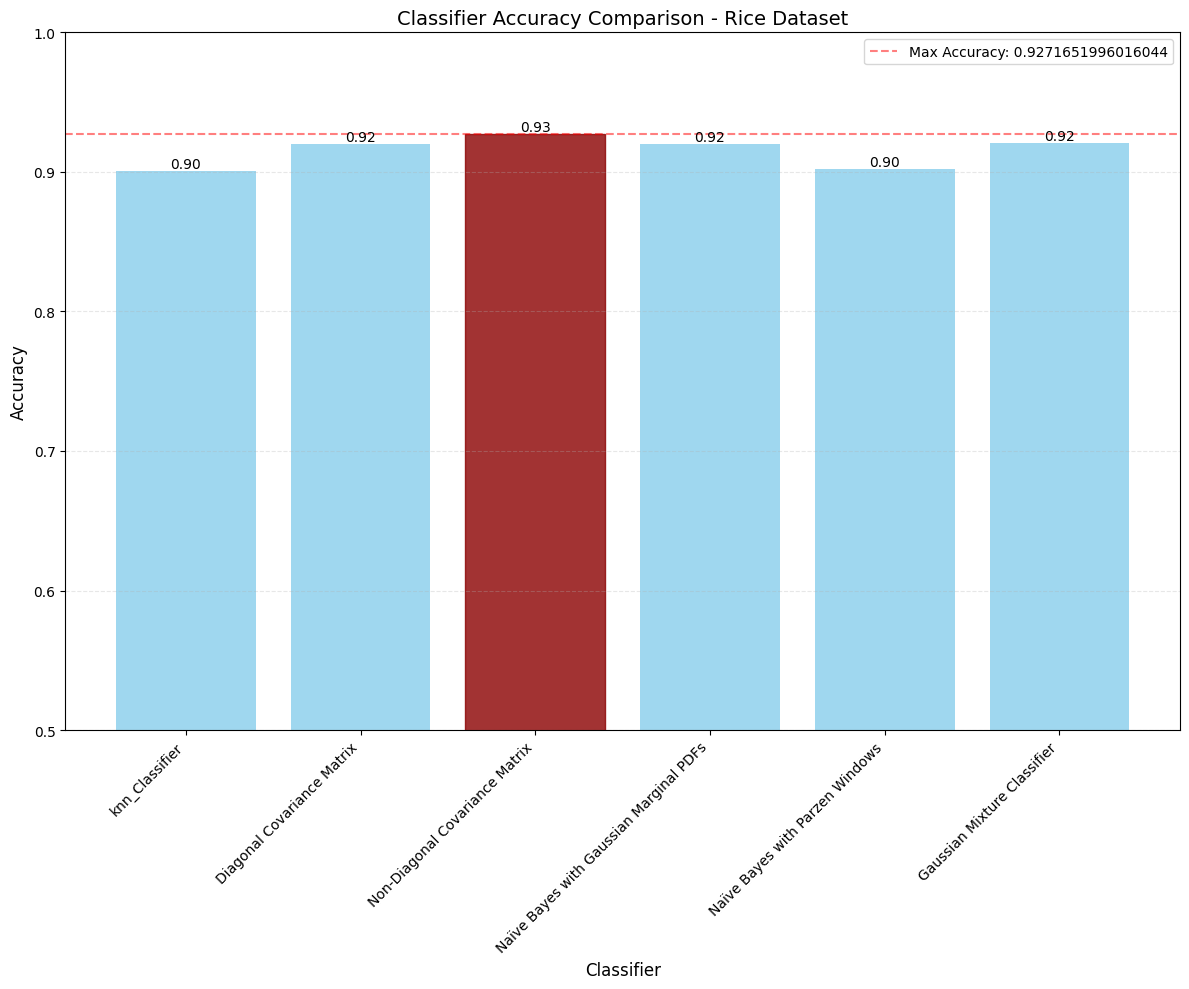

Test set


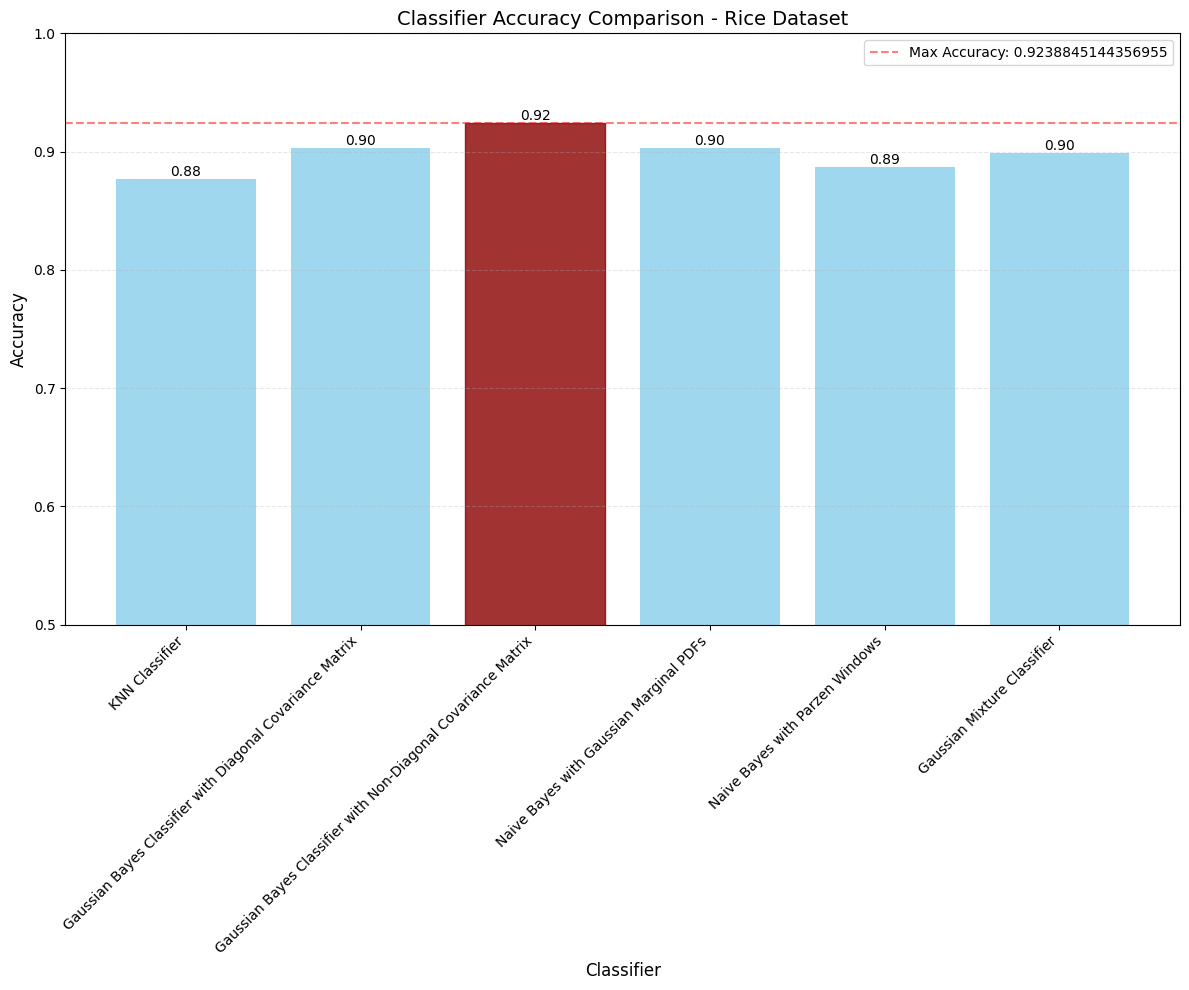

In [176]:
print("Validation set")
show_results(classifier_accuracy_rice, "Rice")
print("Test set")
show_results(test_set_classifier_accuracy_rice, "Rice")

#### Heart Dataset

Validation set


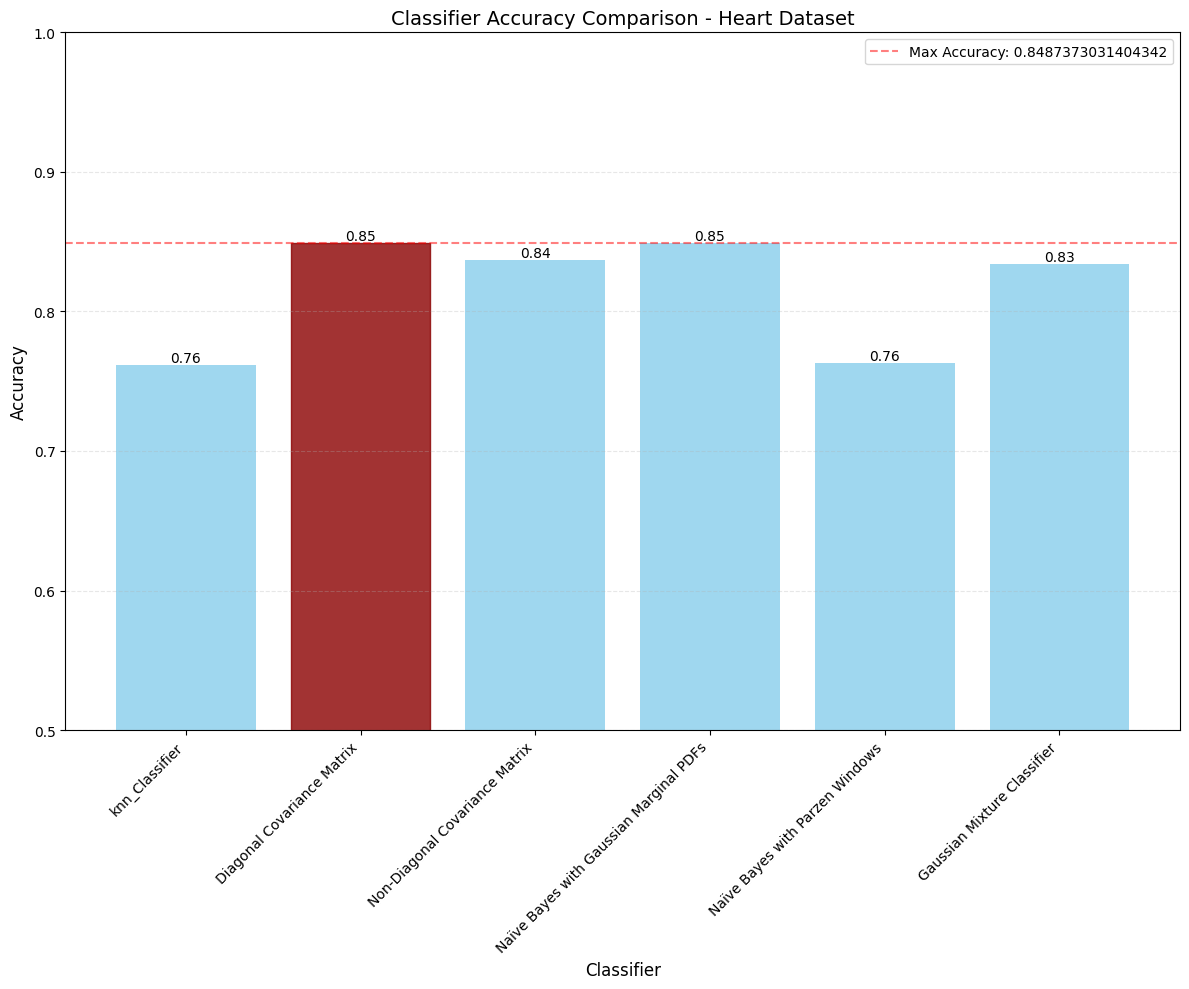

Test set


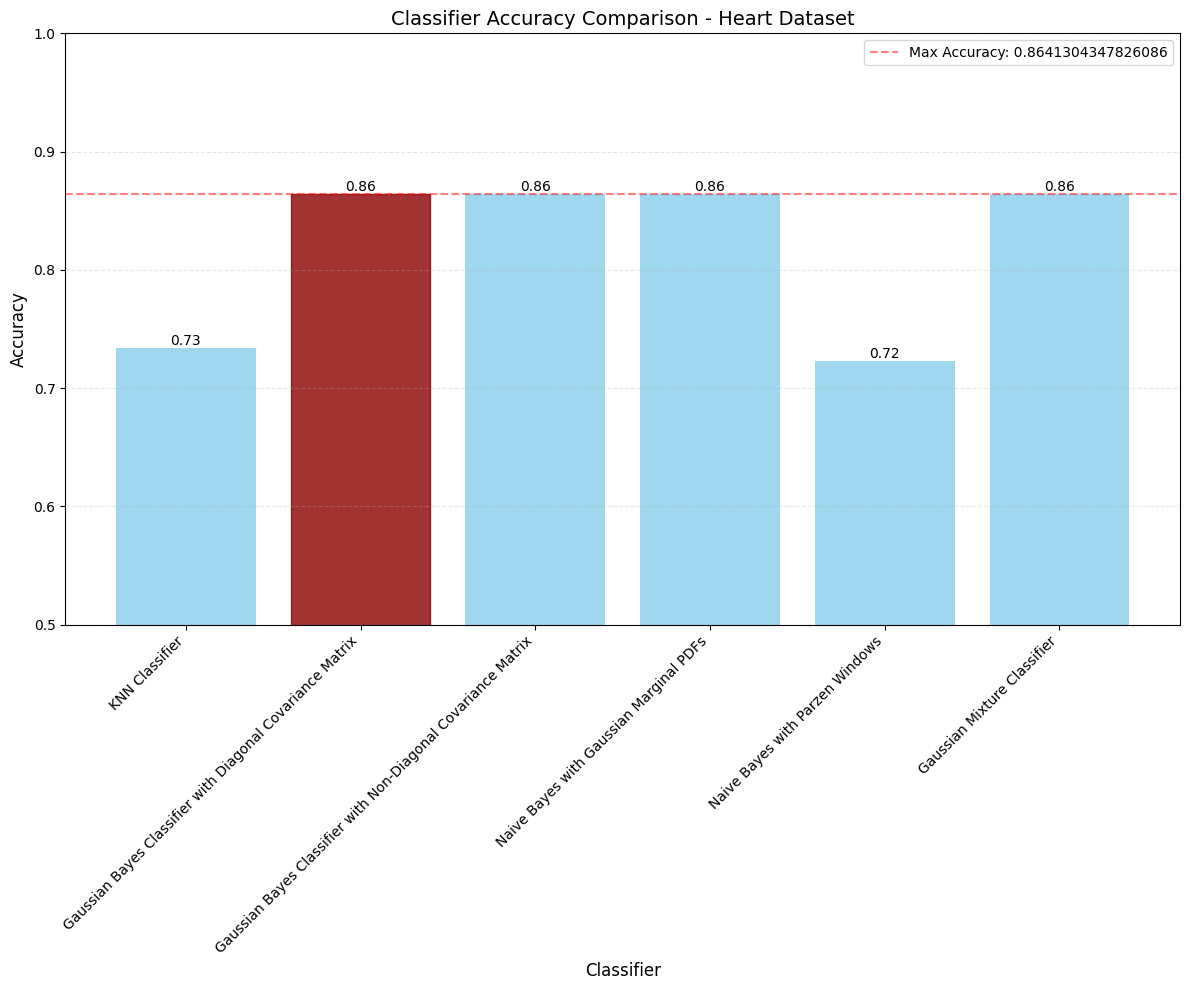

In [177]:
print("Validation set")
show_results(classifier_accuracy_heart, "Heart")
print("Test set")
show_results(test_set_classifier_accuracy_heart, "Heart")

---
## **6. Final Remarks**

In this notebook, we implemented and evaluated k-NN and Bayes classifiers for two classification tasks:
- rice grain classification and
- heart failure prediction.
We compared the performance of the classifiers using cross-validation and test set results. The results show that the choice of classifier and hyperparameters significantly affects the classification accuracy. The Gaussian Mixture Bayes classifier and _k_-NN classifier performed well on both datasets, demonstrating the importance of selecting appropriate classifiers for different tasks.

The results show that our models have achieved high generalization ability, since the accuracy on the test set is very close to the accuracy obtained in the cross-validation process. This indicates that our models are not overfitting the training data.

The _k_-NN classifier was consistently had the lowest accuracies, followed by the Naive Bayes classifier with Parzen Windows. On the other hand, all the other Bayes Classifiers displayed similar levels of accuracies, so we can conclude that in real world applications of such classification tasks, a simple Bayes Classifier would be more than enough to perform such tasks.